In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# read and merged data
# read data set from file csv
data_train_p1 = pd.read_excel("Data_Train_p1.xlsx")
data_train_p2 = pd.read_excel("Data_Train_p2.xlsx")
print(data_train_p2.head())# merged data set 
data_train = pd.concat([data_train_p1, data_train_p2])

       Airline Date_of_Journey    Source Destination            Route  \
0       IndiGo      15/05/2019     Delhi      Cochin  DEL → HYD → COK   
1  Jet Airways      18/05/2019   Kolkata    Banglore  CCU → BOM → BLR   
2  Jet Airways      18/05/2019    Mumbai   Hyderabad        BOM → HYD   
3       IndiGo      12/04/2019  Banglore       Delhi        BLR → DEL   
4     SpiceJet      21/05/2019   Chennai     Kolkata        MAA → CCU   

  Dep_Time  Arrival_Time Duration Total_Stops               Additional_Info  \
0    06:50         16:10   9h 20m      1 stop                       No info   
1    08:25         16:20   7h 55m      1 stop   In-flight meal not included   
2    10:20         11:50   1h 30m    non-stop                       No info   
3    23:30  02:20 13 Apr   2h 50m    non-stop                       No info   
4    09:45         12:00   2h 15m    non-stop  No check-in baggage included   

   Price  
0   6442  
1  10844  
2   5678  
3   6906  
4   3543  


### Q1. Cho biết kiểu dữ liệu của các thuộc tính

In [3]:
# Đọc thông tin df vừa merge

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10684 entries, 0 to 1868
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10684 non-null  object
 1   Date_of_Journey  10684 non-null  object
 2   Source           10684 non-null  object
 3   Destination      10684 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10684 non-null  object
 6   Arrival_Time     10684 non-null  object
 7   Duration         10684 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10684 non-null  object
 10  Price            10684 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.6+ KB


Kiểu dữ liệu của các thuộc tính: có 10 thuộc tính có kiểu dữ liệu là object và 1 thuộc tính có kiểu dữ liệu là integer.
- Price: kiểu dữ liệu là integer
- Các thuộc tính còn lại: kiểu dữ liệu là object

### Q2. Đối với cột Price, cho biết:
#### 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
#### 2. Độ lệch chuẩn của cột price?
#### 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm. Nhận xét về giá trị mean và median của tập dữ liệu.
#### 4. Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

In [11]:
# 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
# Giá cao nhất
max_price = data_train["Price"].max()
print("Giá cao nhất:", max_price)

# Giá thấp nhất
min_price = data_train["Price"].min()
print("Giá thấp nhất:", min_price)

# Giá trung bình
mean_price = data_train["Price"].mean()
print("Giá trung bình:", mean_price)

# Mức giá xuất hiện nhiều
mode_price = data_train["Price"].mode()[0]
print("Mức giá xuất hiện nhiều:", mode_price)


Giá cao nhất: 79512
Giá thấp nhất: 1759
Giá trung bình: 9087.545582178958
Mức giá xuất hiện nhiều: 10262


In [12]:
# 2. Độ lệch chuẩn của cột price?
std_price = data_train["Price"].std()
print("Độ lệch chuẩn:", std_price)


Độ lệch chuẩn: 4611.411872913706


In [13]:
# 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
# Tính mean và median của cột Price
mean_price = data_train['Price'].mean()
median_price = data_train['Price'].median()
# So sánh mean và median
if mean_price > median_price:
    print("Mean lớn hơn Median, có sự lệch phải (right-skewed).")
elif mean_price < median_price:
    print("Mean nhỏ hơn Median, có sự lệch trái (left-skewed).")
else:
    print("Mean và Median gần nhau, phân phối đối xứng.")

Mean lớn hơn Median, có sự lệch phải (right-skewed).


In [14]:
# Số lượng các điểm dữ liệu trong cột "Price"
number_of_data_points = len(data_train["Price"].unique())
print(number_of_data_points)

# Số lượng các bin trong cột "Price"
import numpy as np
bins = int(1 + np.log2(number_of_data_points))
print(bins)

1870
11


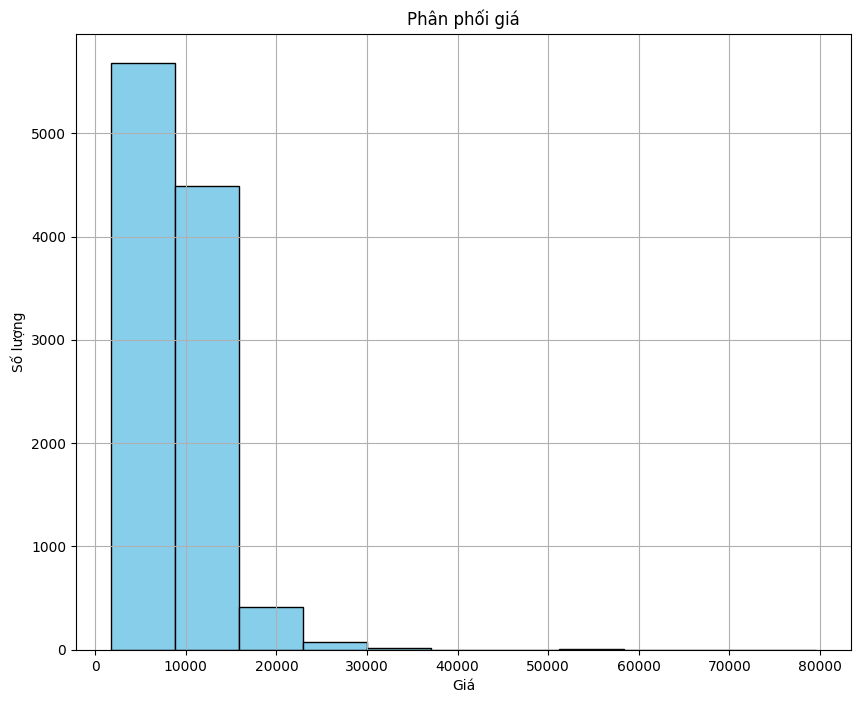

In [15]:
# Vẽ histogram của cột Price
# Vẽ đồ thị histogram
plt.figure(figsize=(10, 8))
plt.hist(data_train['Price'], bins=11, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

Khi mean lớn hơn median và có sự lệch phải (right-skewed), điều này thường cho thấy một số mẫu có giá trị cao hơn, làm tăng mean và kéo mean về phía giá trị lớn. Trong trường hợp này, một số mẫu có giá trị lớn hơn giữa tập dữ liệu, khiến mean lớn hơn median.

Như vậy, dữ liệu có xu hướng tập trung về các giá trị nhỏ, trong khi có một số ít các giá trị lớn hơn, tạo nên phân phối dữ liệu cách xa trung tâm. Điều này có thể ảnh hưởng đến tính đại diện của mean, khi mean có thể bị ảnh hưởng bởi các giá trị cao hơn.

Nhìn chung, với sự lệch phải và mean lớn hơn median, có thể kết luận rằng dữ liệu phân phối cách xa trung tâm và có một số mẫu có giá trị lớn, làm tăng mean so với median. Điều này thường thể hiện sự không đồng đều trong phân phối giá trị của tập dữ liệu.


### Q3. Mô tả số lượng missing value của mỗi thuộc tính  
- Sử dụng isnull() để kiểm tra dữ liệu null
- sum() để tổng số lượng dữ liệu null ở từng cột
- sắp xếp theo thứ tự giảm dần với sort_values()

In [16]:
data_train.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

Số lượng missing value của mỗi thuộc tính
- Route và Total_Stops: mỗi thuộc tính có 1 missing value.
- Các thuộc tính còn lại không có missing value.

### Q4. Tính tỷ lệ % missing value của mỗi thuộc tính

In [4]:
for col in data_train.columns:
    percentage = data_train[col].isnull().mean()
    print(f'{col}: {round(percentage*100, 2)}%')

Airline: 0.0%
Date_of_Journey: 0.0%
Source: 0.0%
Destination: 0.0%
Route: 0.01%
Dep_Time: 0.0%
Arrival_Time: 0.0%
Duration: 0.0%
Total_Stops: 0.01%
Additional_Info: 0.0%
Price: 0.0%


% missing value của mỗi thuộc tính
- Route và Total_Stops: missing value chiếm 0.01% trong tổng số dữ liệu có được.
- Các thuộc tính còn lại không có missing value.

### Q5. Xử lý dữ liệu missing?(xử lí thêm phần duplicate dữ liệu)
#### Do missing value rất rất nhỏ nên em chọn phương pháp xóa bỏ các dòng bị thiếu dữ liệu.

In [5]:
df_no_missing =data_train.dropna()

#### Kiểm tra data có bị duplicate dữ liệu không

In [6]:
duplicate_rows = df_no_missing[df_no_missing.duplicated()]
print("Các dòng trùng lặp:")
print(duplicate_rows)

Các dòng trùng lặp:
          Airline Date_of_Journey    Source Destination  \
809   Jet Airways       9/06/2019     Delhi      Cochin   
977   Jet Airways       6/06/2019     Delhi      Cochin   
1002     SpiceJet      24/03/2019  Banglore   New Delhi   
1135    Air India       9/05/2019     Delhi      Cochin   
1234  Jet Airways      24/06/2019     Delhi      Cochin   
...           ...             ...       ...         ...   
1734  Jet Airways      24/06/2019     Delhi      Cochin   
1759  Jet Airways      21/03/2019     Delhi      Cochin   
1856    Air India      15/05/2019   Kolkata    Banglore   
1863  Jet Airways      27/06/2019     Delhi      Cochin   
1868  Jet Airways      24/03/2019   Kolkata    Banglore   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
809   DEL → JAI → BOM → COK    05:30  04:25 10 Jun  22h 55m     2 stops   
977   DEL → JAI → BOM → COK    05:30  04:25 07 Jun  22h 55m     2 stops   
1002              BLR → DEL    05:45         0

#### Nhận thấy có nhiều dòng bi duplicate nên em sẽ drop chúng đi.

In [7]:
df_cleaned = df_no_missing.drop_duplicates()

## 6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

### Create a boxplot to observe outliers in 'Price' column

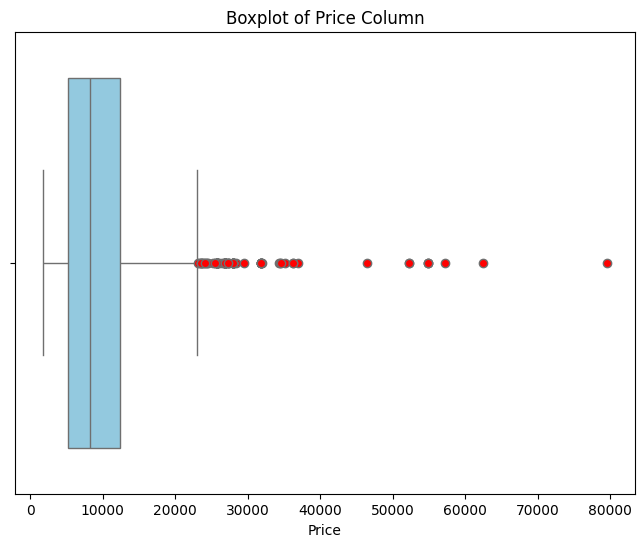

In [8]:
# Create a horizontal boxplot for the 'Price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Price'], orient='h', color='skyblue', flierprops=dict(markerfacecolor='red', marker='o'))

# Customize boxplot
plt.title('Boxplot of Price Column')
plt.xlabel('Price')

# Show boxplot
plt.show()

Ta thấy dữ liệu có khá nhiều outliers, do tập dữ liệu có nhiều yếu tố ảnh hưởng đến giá máy bay như hãng hàng không, đi xuất phát, điểm đến, độ dài chuyến bay,... Vì thế các outliers này là điều không thể tránh khỏi. Ta cùng khám phá các đặc điểm của các outliers này: 

### Detect outliers

In [9]:
# Calculate the interquartile range (IQR)
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['Price'] < lower_bound) | (df_cleaned['Price'] > upper_bound)]

# Display the identified outliers
print('The number of outliers: ', len(outliers))
print("Outliers:")
print(outliers)

The number of outliers:  94
Outliers:
                Airline Date_of_Journey    Source Destination  \
123           Air India       1/03/2019     Delhi      Cochin   
396   Multiple carriers       1/03/2019     Delhi      Cochin   
627         Jet Airways      01/03/2019  Banglore   New Delhi   
688         Jet Airways      01/03/2019  Banglore   New Delhi   
750         Jet Airways      18/03/2019  Banglore   New Delhi   
...                 ...             ...       ...         ...   
1365        Jet Airways      01/03/2019  Banglore   New Delhi   
1498        Jet Airways      01/03/2019  Banglore   New Delhi   
1635          Air India      01/03/2019  Banglore   New Delhi   
1679        Jet Airways      01/03/2019  Banglore   New Delhi   
1688        Jet Airways      15/03/2019  Banglore   New Delhi   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
123         DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396         DEL → BOM → COK    

### Create df_no_outliers by remove outliers to compare

In [10]:
# Create df_no_outliers
df_no_outliers = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

In [11]:
# Mean of df_no_outliers price
mean_no_outliers = df_no_outliers['Price'].mean()

# Mean of outliers price
mean_outliers = outliers['Price'].mean()

# Calculate the percentage difference
percentage_difference = ((mean_outliers - mean_no_outliers) / mean_no_outliers) * 100

# Print the percentage difference
print("Average price of outliers price: ", mean_outliers)

print("Average price of no outliers price: ", mean_no_outliers)

print(f"Percentage Difference: {percentage_difference:.2f}%")

Average price of outliers price:  30423.042553191488
Average price of no outliers price:  8832.804205246914
Percentage Difference: 244.43%


Qua việc tính giá trung bình của outliers ta thấy rằng những chuyến bay này có giá rất cao (cao hơn 244,43% so với những chuyến bay bình thường). Ta cùng tìm hiểu xem những chuyến bay này thường xuất phát ở đâu và hạ cánh ở đâu:

Percentage Distribution of Source in outliers:
Source
Banglore    76.60
Delhi       17.02
Mumbai       5.32
Kolkata      1.06
Name: count, dtype: float64


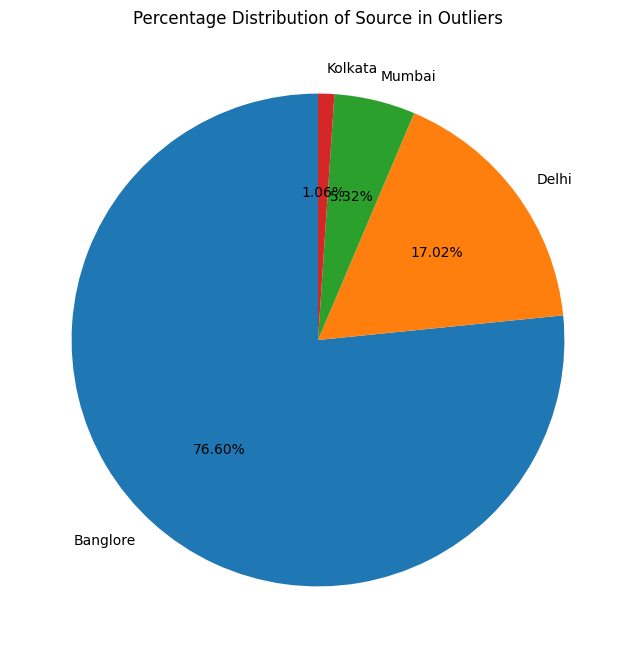

In [25]:
# Calculate the percentage each Source of outliers
percentage_distribution_outliers = (outliers['Source'].value_counts() / len(outliers)) * 100

# Calculate the percentage Source for df
percentage_distribution_df = (df_cleaned['Source'].value_counts() / len(df_cleaned)) * 100

# Display the percentage Source in outliers
print("Percentage Distribution of Source in outliers:")
print(percentage_distribution_outliers.round(2))

# Create a pie chart to perform it
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution_outliers, labels=percentage_distribution_outliers.index, autopct='%1.2f%%', startangle=90)

plt.title('Percentage Distribution of Source in Outliers')

plt.show()

Như vậy ta có thể thấy rằng, những chuyến bay có giá cao nhất sẽ là từ Banglore -> New Delhi, Delhi -> Cochin,...

Vậy những hãng máy bay nào thường sẽ có giá cao: 

Airline Counts in outliers:
Airline
Jet Airways             62
Air India               15
Multiple carriers       10
Jet Airways Business     6
SpiceJet                 1
Name: count, dtype: int64


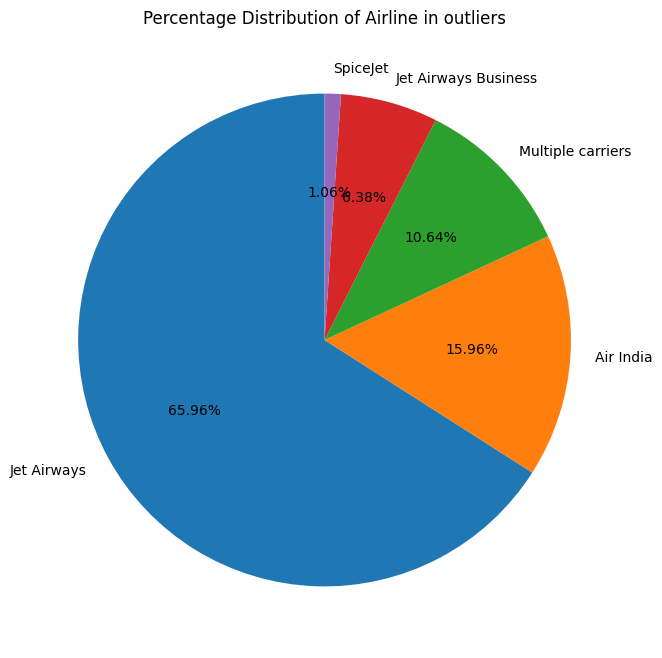

In [26]:
# Count the occurrences of each Airline in outliers
airline_counts_outliers = outliers['Airline'].value_counts()

# Display the counts
print("Airline Counts in outliers:")
print(airline_counts_outliers)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(airline_counts_outliers, labels=airline_counts_outliers.index, autopct='%1.2f%%', startangle=90)
plt.title('Percentage Distribution of Airline in outliers')
plt.show()

Thông qua pie chart trên, ta thấy rằng hãng hàng không Jet Airways chiếm phần lớn trong các outliers. Vì Jet Airways tập trung cung cấp các dịch vụ và tiện nghi cao cấp (nhưng đã ngưng hoạt động từ năm 2019).

# Visualize dữ liệu dạng bảng hoặc đồ thị: 


### **1. Giá vé tăng khi nào ?**


#### **1.1. Quan sát giá vé theo tháng**


C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\2462358179.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly = df_cleaned_copy['Price'].resample('M').mean().fillna(method='ffill').reindex(pd.to_datetime(date_range))


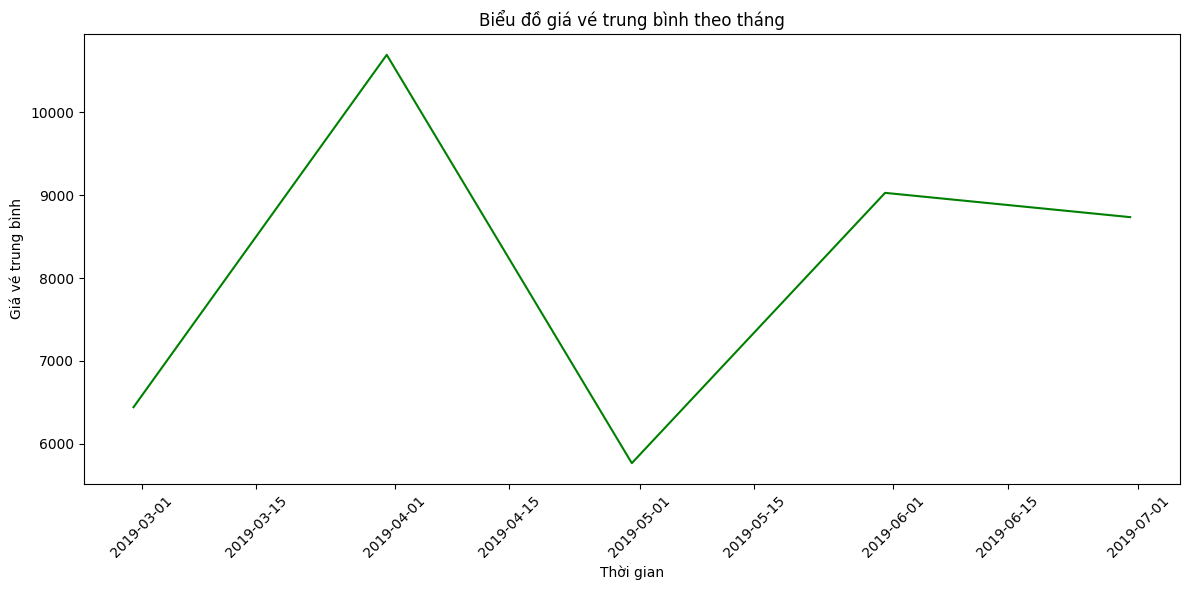

In [59]:
#Sao chép để không bị lỗi
df_cleaned_copy = df_cleaned.copy()
# Thêm dữ liệu vào cuối tháng 2 và vào đầu tháng 7 để có thể nhìn được toàn bộ dữ liệu
# Thêm dữ liệu vào cuối tháng 2
df_cleaned_copy = pd.concat([df_cleaned_copy, pd.DataFrame({
    'Airline': 'IndiGo',
    'Date_of_Journey': '28/02/2019',
    'Source': 'Delhi',
    'Destination': 'Cochin',
    'Route': 'DEL → HYD → COK',
    'Dep_Time': '06:50',
    'Arrival_Time': '16:10',
    'Duration': '9h 20m',
    'Total_Stops': '1 stop',
    'Additional_Info': 'No info',
    'Price': 6442
}, index=[df_cleaned_copy.index.max() + 1])], ignore_index=True)
# Thêm dữ liệu vào đầu tháng 7
df_cleaned_copy = pd.concat([df_cleaned_copy, pd.DataFrame({
    'Airline': 'IndiGo',
    'Date_of_Journey': '01/07/2019',
    'Source': 'Delhi',
    'Destination': 'Cochin',
    'Route': 'DEL → HYD → COK',
    'Dep_Time': '06:50',
    'Arrival_Time': '16:10',
    'Duration': '9h 20m',
    'Total_Stops': '1 stop',
    'Additional_Info': 'No info',
    'Price': 6442
}, index=[df_cleaned_copy.index.max() + 1])], ignore_index=True)
# Chuyển cột 'Date_of_Journey' thành kiểu dữ liệu datetime
df_cleaned_copy['Date_of_Journey'] = pd.to_datetime(df_cleaned_copy['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Đặt cột 'Date_of_Journey' làm index để sử dụng resample
df_cleaned_copy.set_index('Date_of_Journey', inplace=True)

# Tạo chuỗi ngày từ tháng đầu tiên đến tháng cuối cùng trong dữ liệu
date_range = pd.date_range(df_cleaned_copy.index.min(), df_cleaned_copy.index.max(), freq='M')

# Sử dụng reindex để đảm bảo rằng DataFrame có tất cả các tháng trong chuỗi ngày
df_monthly = df_cleaned_copy['Price'].resample('M').mean().fillna(method='ffill').reindex(pd.to_datetime(date_range))

# Vẽ biểu đồ giá vé trung bình theo tháng
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, color='green')
plt.title('Biểu đồ giá vé trung bình theo tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá vé trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Nhận xét:**
##### *1.1.1 Giá vé bắt đầu tăng từ đầu tháng 3 đến đầu tháng 4.*
##### *1.1.2 Ngay sau đó giá vé lại giảm mạnh đến đầu tháng 5.*
##### *1.1.3 Từ đầu tháng 5 giá vé lại tăng, mức tăng trung bình khoảng 3000 cho đến đầu tháng 6.*
##### *1.1.4 Trong tháng 6 giá vé có xu hướng giảm nhẹ.*
##### *1.1.5 Để ý rằng chúng ta không thể kết luận giá vé dựa trên ngày trong tháng mà phải dựa trên ngày trong tháng cụ thể.*


#### **1.2. Quan sát giá vé theo hãng hàng không**


C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\2278178539.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price', y='Airline', data=df_cleaned, ci=None, palette=palette_colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\2278178539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Airline', data=df_cleaned, ci=None, palette=palette_colors)


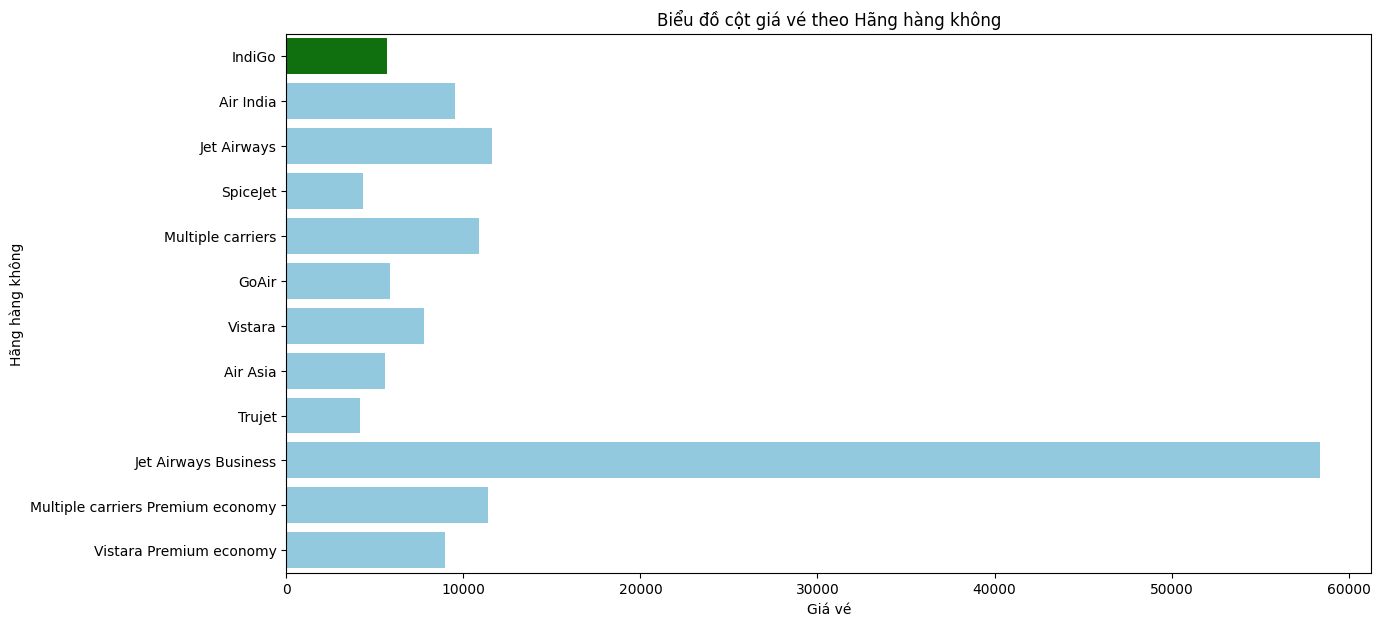

In [46]:
plt.figure(figsize=(14, 7))
palette_colors = ['green'] + ['skyblue'] * (len(df_cleaned['Airline'].unique()) - 1)
sns.barplot(x='Price', y='Airline', data=df_cleaned, ci=None, palette=palette_colors)
plt.title('Biểu đồ cột giá vé theo Hãng hàng không')
plt.xlabel('Giá vé')
plt.ylabel('Hãng hàng không')
plt.show()

#### **Nhận xét:**
##### *1.2.1 Giá vé bắt đầu tăng mạnh khi sử dụng hãng hàng không Jet Airways Business.*
##### *1.2.2 Có thể Jet Airways Business là một hãng hàng không dành cho doanh nhân và có nhiều chuyến bay hạng sang.*


#### **1.3. Quan sát giá vé theo nguồn và đích của chuyến bay.**


C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\3867502444.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price', y='Source', data=df_cleaned, ci=None, palette=palette_colors_source)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\3867502444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Source', data=df_cleaned, ci=None, palette=palette_colors_source)


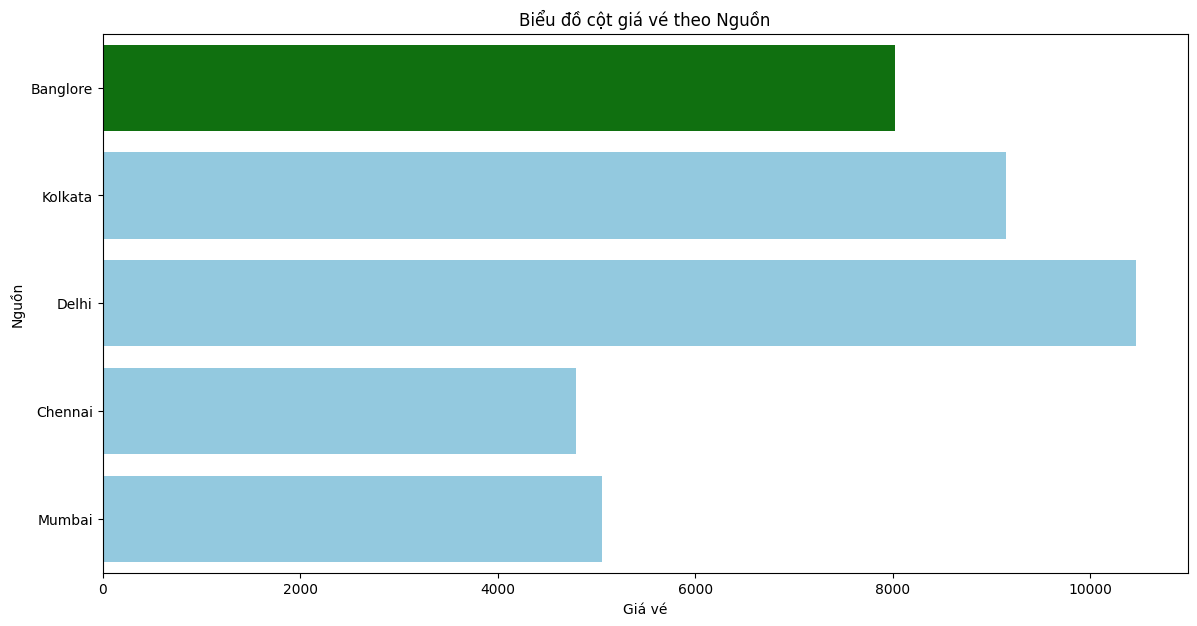

C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\3867502444.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price', y='Destination', data=df_cleaned, ci=None, palette=palette_colors_destination)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\3867502444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Destination', data=df_cleaned, ci=None, palette=palette_colors_destination)


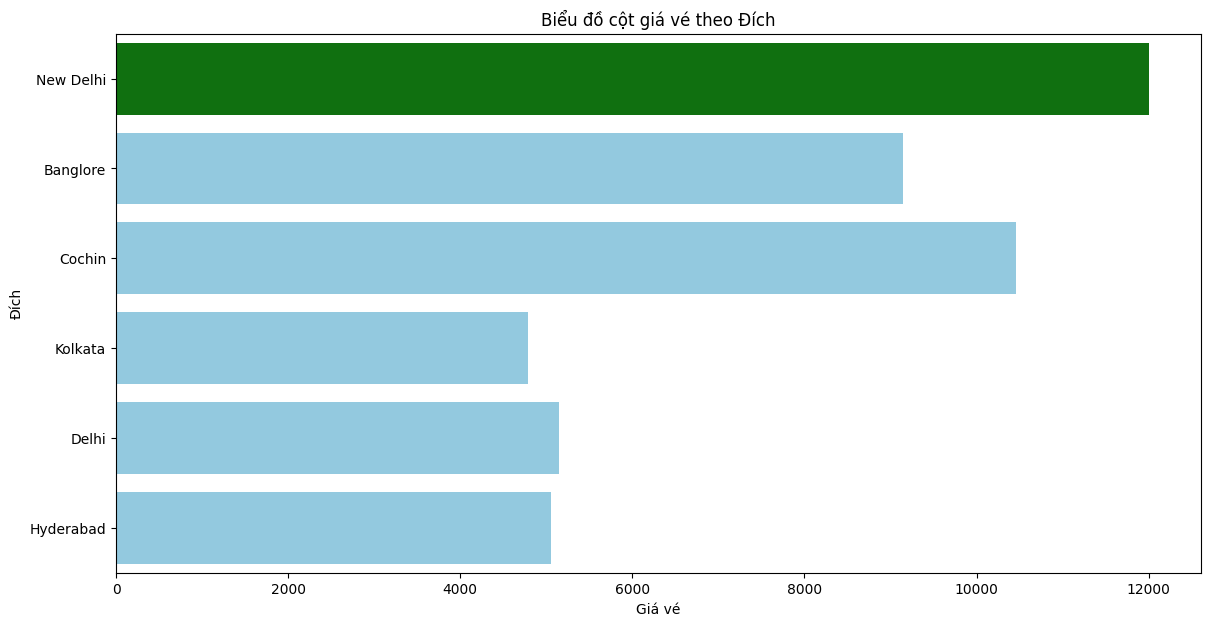

In [48]:
# Vẽ biểu đồ cột giá vé theo Nguồn
plt.figure(figsize=(14, 7))
palette_colors_source = ['green'] + ['skyblue'] * (len(df_cleaned['Source'].unique()) - 1)
sns.barplot(x='Price', y='Source', data=df_cleaned, ci=None, palette=palette_colors_source)
plt.title('Biểu đồ cột giá vé theo Nguồn')
plt.xlabel('Giá vé')
plt.ylabel('Nguồn')
plt.show()

# Vẽ biểu đồ cột giá vé theo Đích
plt.figure(figsize=(14, 7))
palette_colors_destination = ['green'] + ['skyblue'] * (len(df_cleaned['Destination'].unique()) - 1)
sns.barplot(x='Price', y='Destination', data=df_cleaned, ci=None, palette=palette_colors_destination)
plt.title('Biểu đồ cột giá vé theo Đích')
plt.xlabel('Giá vé')
plt.ylabel('Đích')
plt.show()


#### **Nhận xét:**
##### *1.3.1 Giá vé có sự khác biệt rõ rệt giữa các đích đến hay nơi khỏi hành khác nhau.*
##### *1.3.2 Nơi khởi hành có giá vé cao nhất là Delhi có thể dự đoán đây là 1 trong các trung tâm của Ấn Độ.*
##### *1.3.3 Nơi đích đến có giá vé cao nhất là New Delhi có thể dự đoán đây cũng là 1 trong các trung tâm của Ấn độ*
##### *1.3.4 Nhưng dựa vào hai biểu đồ trên thì vẫn rất mơ hồ và khó kết luận*



#### **1.4. Quan sát giá vé theo giờ bay**


C:\Users\Admin\AppData\Local\Temp\ipykernel_13956\830567341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Duration_minutes'] = df_cleaned['Duration'].apply(convert_to_minutes)


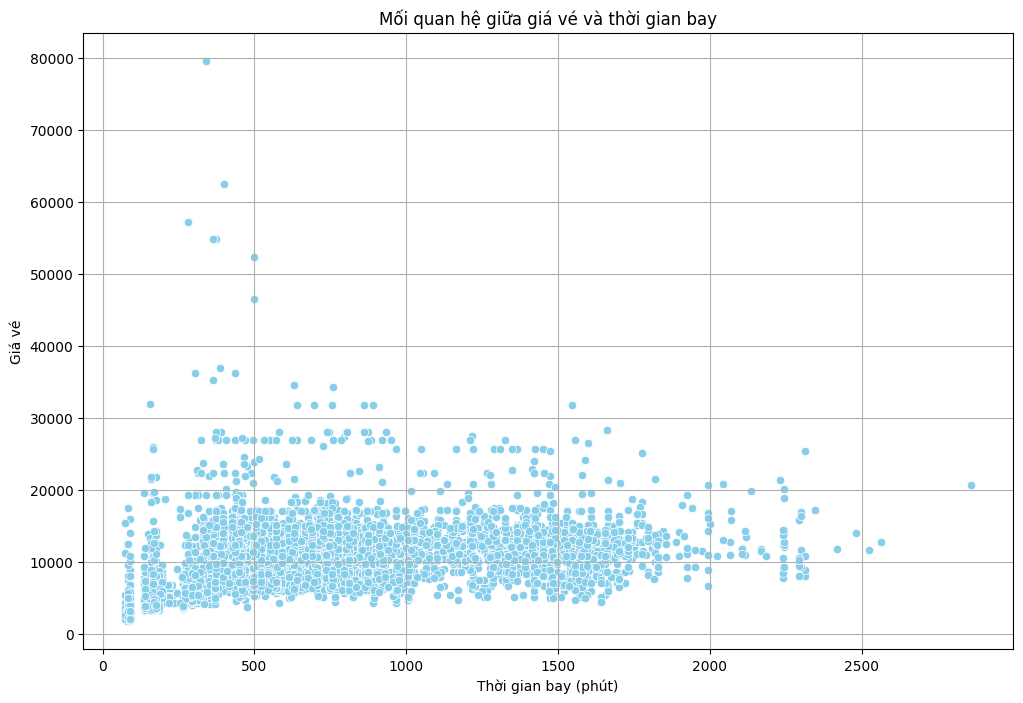

In [27]:
#Chuyển về số giờ
def convert_to_minutes(duration):
    try:
        hours, minutes = map(int, duration.replace('h', '').replace('m', '').split())
        total_minutes = hours*60  + minutes
        return total_minutes
    except:
        return None
df_cleaned['Duration_minutes'] = df_cleaned['Duration'].apply(convert_to_minutes)
# Loại bỏ các dòng có giá trị Duration_minutes là None
filtered_data = df_cleaned.dropna(subset=['Duration_minutes'])
# Vẽ histogram cho cột Duration_minutes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration_minutes', y='Price', data=filtered_data, color='skyblue')
plt.title('Mối quan hệ giữa giá vé và thời gian bay')
plt.xlabel('Thời gian bay (phút)')
plt.ylabel('Giá vé')
plt.grid(True)
plt.show()

#### **Nhận xét:**
##### *1.4.1 Dựa vào biểu đồ chúng ta không thể kết luận giá vé và giờ bay có liên quan.*
##### *1.4.2 Có thể nhiều chuyến bay hạng sang nhưng lại đi trong ít giờ thì giá vé vẫn có thể bằng hoặc thậm chí cao hơn các chuyến bay nhiều giờ giá bình dân.*


#### **2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng) ?**


In [29]:
# Xem các giá trị duy nhất trong cột Total_Stops
print(df_cleaned['Total_Stops'].unique())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1573602458.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stops_count.index, y=stops_count.values, palette=colors, ax=axes[1])


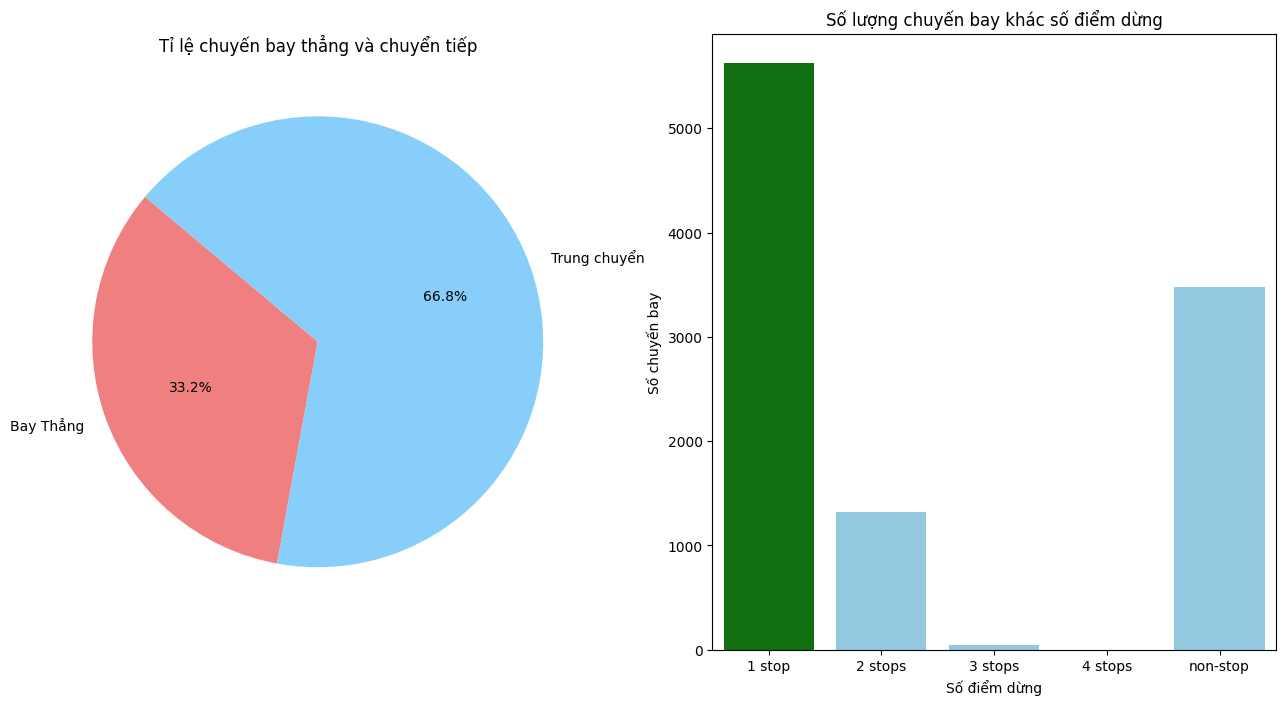

In [30]:
# Tính số lượng và tỷ lệ chuyến bay trực tiếp và chuyển tiếp
direct_flights_count = len(df_cleaned[df_cleaned['Total_Stops'] == 'non-stop'])
transit_flights_count = len(df_cleaned[df_cleaned['Total_Stops'] != 'non-stop'])
total_flights = len(df_cleaned)

direct_flights_ratio = direct_flights_count / total_flights
transit_flights_ratio = transit_flights_count / total_flights

# Đếm số chuyến bay có số lượng dừng khác nhau
stops_count = df_cleaned['Total_Stops'].value_counts().sort_index()

# Vẽ cả biểu đồ hình tròn và biểu đồ cột trong cùng một đầu ra
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Biểu đồ hình tròn
labels = ['Bay Thẳng', 'Trung chuyển']
sizes = [direct_flights_ratio, transit_flights_ratio]
colors = ['lightcoral', 'lightskyblue']
axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Tỉ lệ chuyến bay thẳng và chuyển tiếp')

# Biểu đồ cột
colors = ['green' if x == stops_count.index[0] else 'skyblue' for x in stops_count.index]
sns.barplot(x=stops_count.index, y=stops_count.values, palette=colors, ax=axes[1])
axes[1].set_title('Số lượng chuyến bay khác số điểm dừng')
axes[1].set_xlabel('Số điểm dừng')
axes[1].set_ylabel('Số chuyến bay')

plt.show()

#### Nhận xét:
##### *2.1 Tỷ lệ chuyến bay thẳng chỉ bằng một nửa so với chuyến bay có điểm dừng.*
##### *2.2 Trong chuyến bay có điểm dừng thì 1 điểm dừng là phổ biến nhất, 3 hay 4 điểm dừng là rất ít.*


#### **3. Thành phố nào có lượng chuyến bay nhiều nhất?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3614339274.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts_by_source.index, y=flight_counts_by_source.values, palette=colors_source, ax=axes[0]),axes[0].set_title('Số lượng chuyến bay theo nguồn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3614339274.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts_by_destination.index, y=flight_counts_by_destination.values, palette=colors_destination, ax=axes[1])


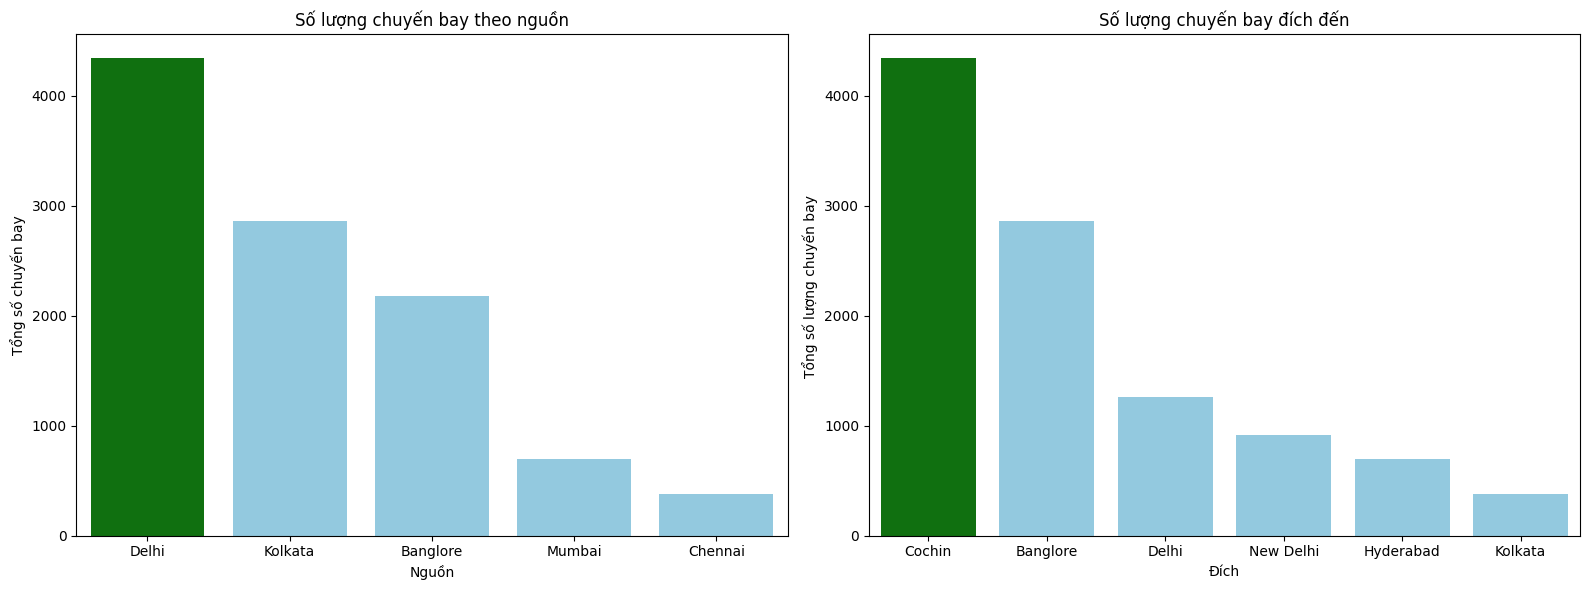

In [31]:
flight_counts_by_source = df_cleaned['Source'].value_counts()
flight_counts_by_destination = df_cleaned['Destination'].value_counts()

common_palette = 'viridis'

#Vẽ cả hai biểu đồ
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Biểu đồ cột theo chuyến bay khỏi hành
colors_source = ['green' if x == flight_counts_by_source.index[0] else 'skyblue' for x in flight_counts_by_source.index]
sns.barplot(x=flight_counts_by_source.index, y=flight_counts_by_source.values, palette=colors_source, ax=axes[0]),axes[0].set_title('Số lượng chuyến bay theo nguồn')
axes[0].set_xlabel('Nguồn')
axes[0].set_ylabel('Tổng số chuyến bay')

# Biểu đồ cột theo chuyến bay điểm đến
colors_destination = ['green' if x == flight_counts_by_destination.index[0] else 'skyblue' for x in flight_counts_by_destination.index]
sns.barplot(x=flight_counts_by_destination.index, y=flight_counts_by_destination.values, palette=colors_destination, ax=axes[1])
axes[1].set_title('Số lượng chuyến bay đích đến')
axes[1].set_xlabel('Đích')
axes[1].set_ylabel('Tổng số lượng chuyến bay ')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

#### Nhận xét:
##### *3.1 Số chuyến bay khởi hành từ Delhi là cao nhất sau đó là Kolkata, Banglore, Mumbai, Chennai,...*
##### *3.2 Số lượng chuyến bay đáp xuống CoChin là cao nhất sau đó là Banglore, Delhi, New Delhi,...*

#### **4. Hãng máy bay nào có số chuyến bay nhiều/thấp nhất?**

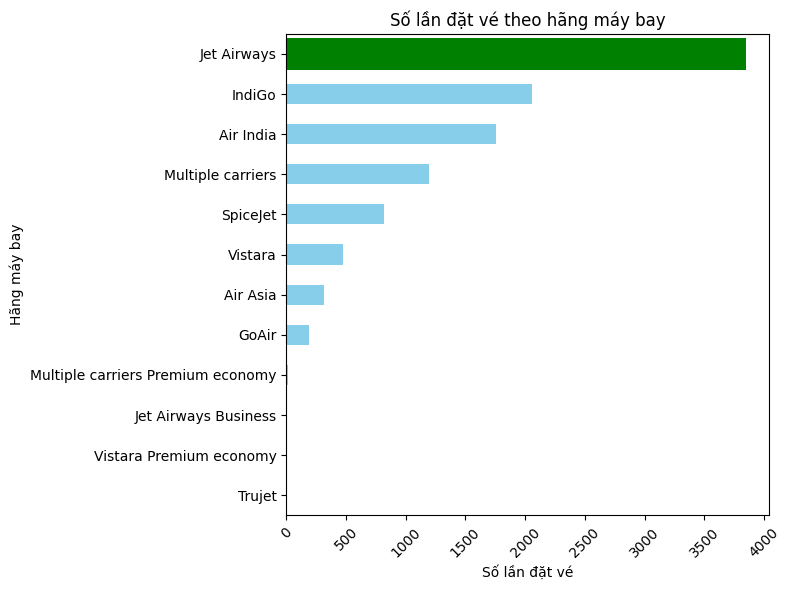

Hãng máy bay được đặt vé nhiều nhất: Jet Airways
Hãng máy bay được đặt vé ít nhất: Trujet


In [32]:
# Phân tích hãng máy bay được đặt vé nhiều nhất và ít nhất
airline_counts = data_train['Airline'].value_counts().sort_values()
most_booked_airline = airline_counts.idxmax()
least_booked_airline = airline_counts.idxmin()
n = len(airline_counts) - 1
# Trực quan hóa số lần đặt vé của các hãng máy bay
plt.figure(figsize=(8, 6))
airline_counts.plot(kind='barh', color='skyblue')
plt.title('Số lần đặt vé theo hãng máy bay')
plt.barh(n, airline_counts.iloc[n], color='green')
plt.xlabel('Số lần đặt vé')
plt.ylabel('Hãng máy bay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Hãng máy bay được đặt vé nhiều nhất: {most_booked_airline}')
#print(most_booked_airlines)
print(f'Hãng máy bay được đặt vé ít nhất: {least_booked_airline}')
#print(least_booked_airlines)


#### **5. Tháng cao điểm?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1107813093.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_train['Date_of_Journey'] = pd.to_datetime(data_train['Date_of_Journey'])


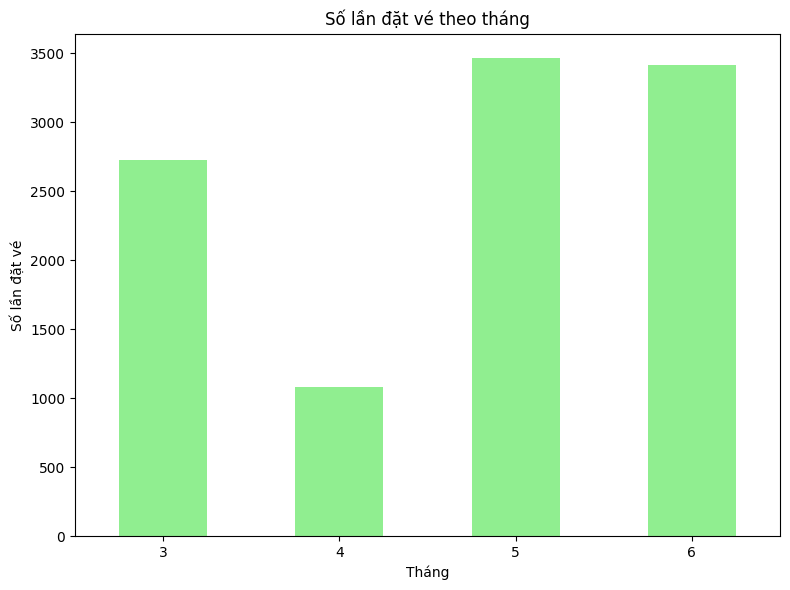

Tháng cao điểm là tháng số: 5


In [33]:
# Phân tích tháng là tháng cao điểm
data_train['Date_of_Journey'] = pd.to_datetime(data_train['Date_of_Journey'])
data_train['Month'] = data_train['Date_of_Journey'].dt.month

month_counts = data_train['Month'].value_counts().sort_index()

# Trực quan hóa số lần đặt vé theo tháng
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Số lần đặt vé theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lần đặt vé')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

peak_month = month_counts.idxmax()
print(f'Tháng cao điểm là tháng số: {peak_month}')

#### **6. Giá có thay đổi tuỳ theo hãng hàng không hay không?**

<b> Mục tiêu: </b> 
- xem xét theo từng chuyến bay cùng điểm xuất phát và điểm đến, giữa các hãng hàng không có sự khác biệt về giá cả hay không.  

<b> Các thuộc tính liên quan: </b>  
- Airline
- Source
- Destination
- Price

<b> Hướng tiếp cận: </b>
- Sử dụng biểu đồ.
- Sử dụng boxplot để xem phân phối giá vé giữa các hãng hàng không theo từng chuyến bay cùng điểm xuất phát và điểm đến.
- Để có sự so sánh, tính mean để biết được trung bình ở một chuyến bay thì hãng hàng không đó sẽ có giá bao nhiêu. Sử dụng biểu đồ cột để so sánh giữa các hãng hàng không. 

In [34]:
# List các chuyến bay có trong bộ dữ liệu
flights = df_cleaned[['Source', 'Destination']]
flights.drop_duplicates(keep='first', inplace=True, ignore_index=True)

# Lấy các cột cần cho q6
q6 = df_cleaned[['Airline', 'Source', 'Destination', 'Price']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1008231570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights.drop_duplicates(keep='first', inplace=True, ignore_index=True)


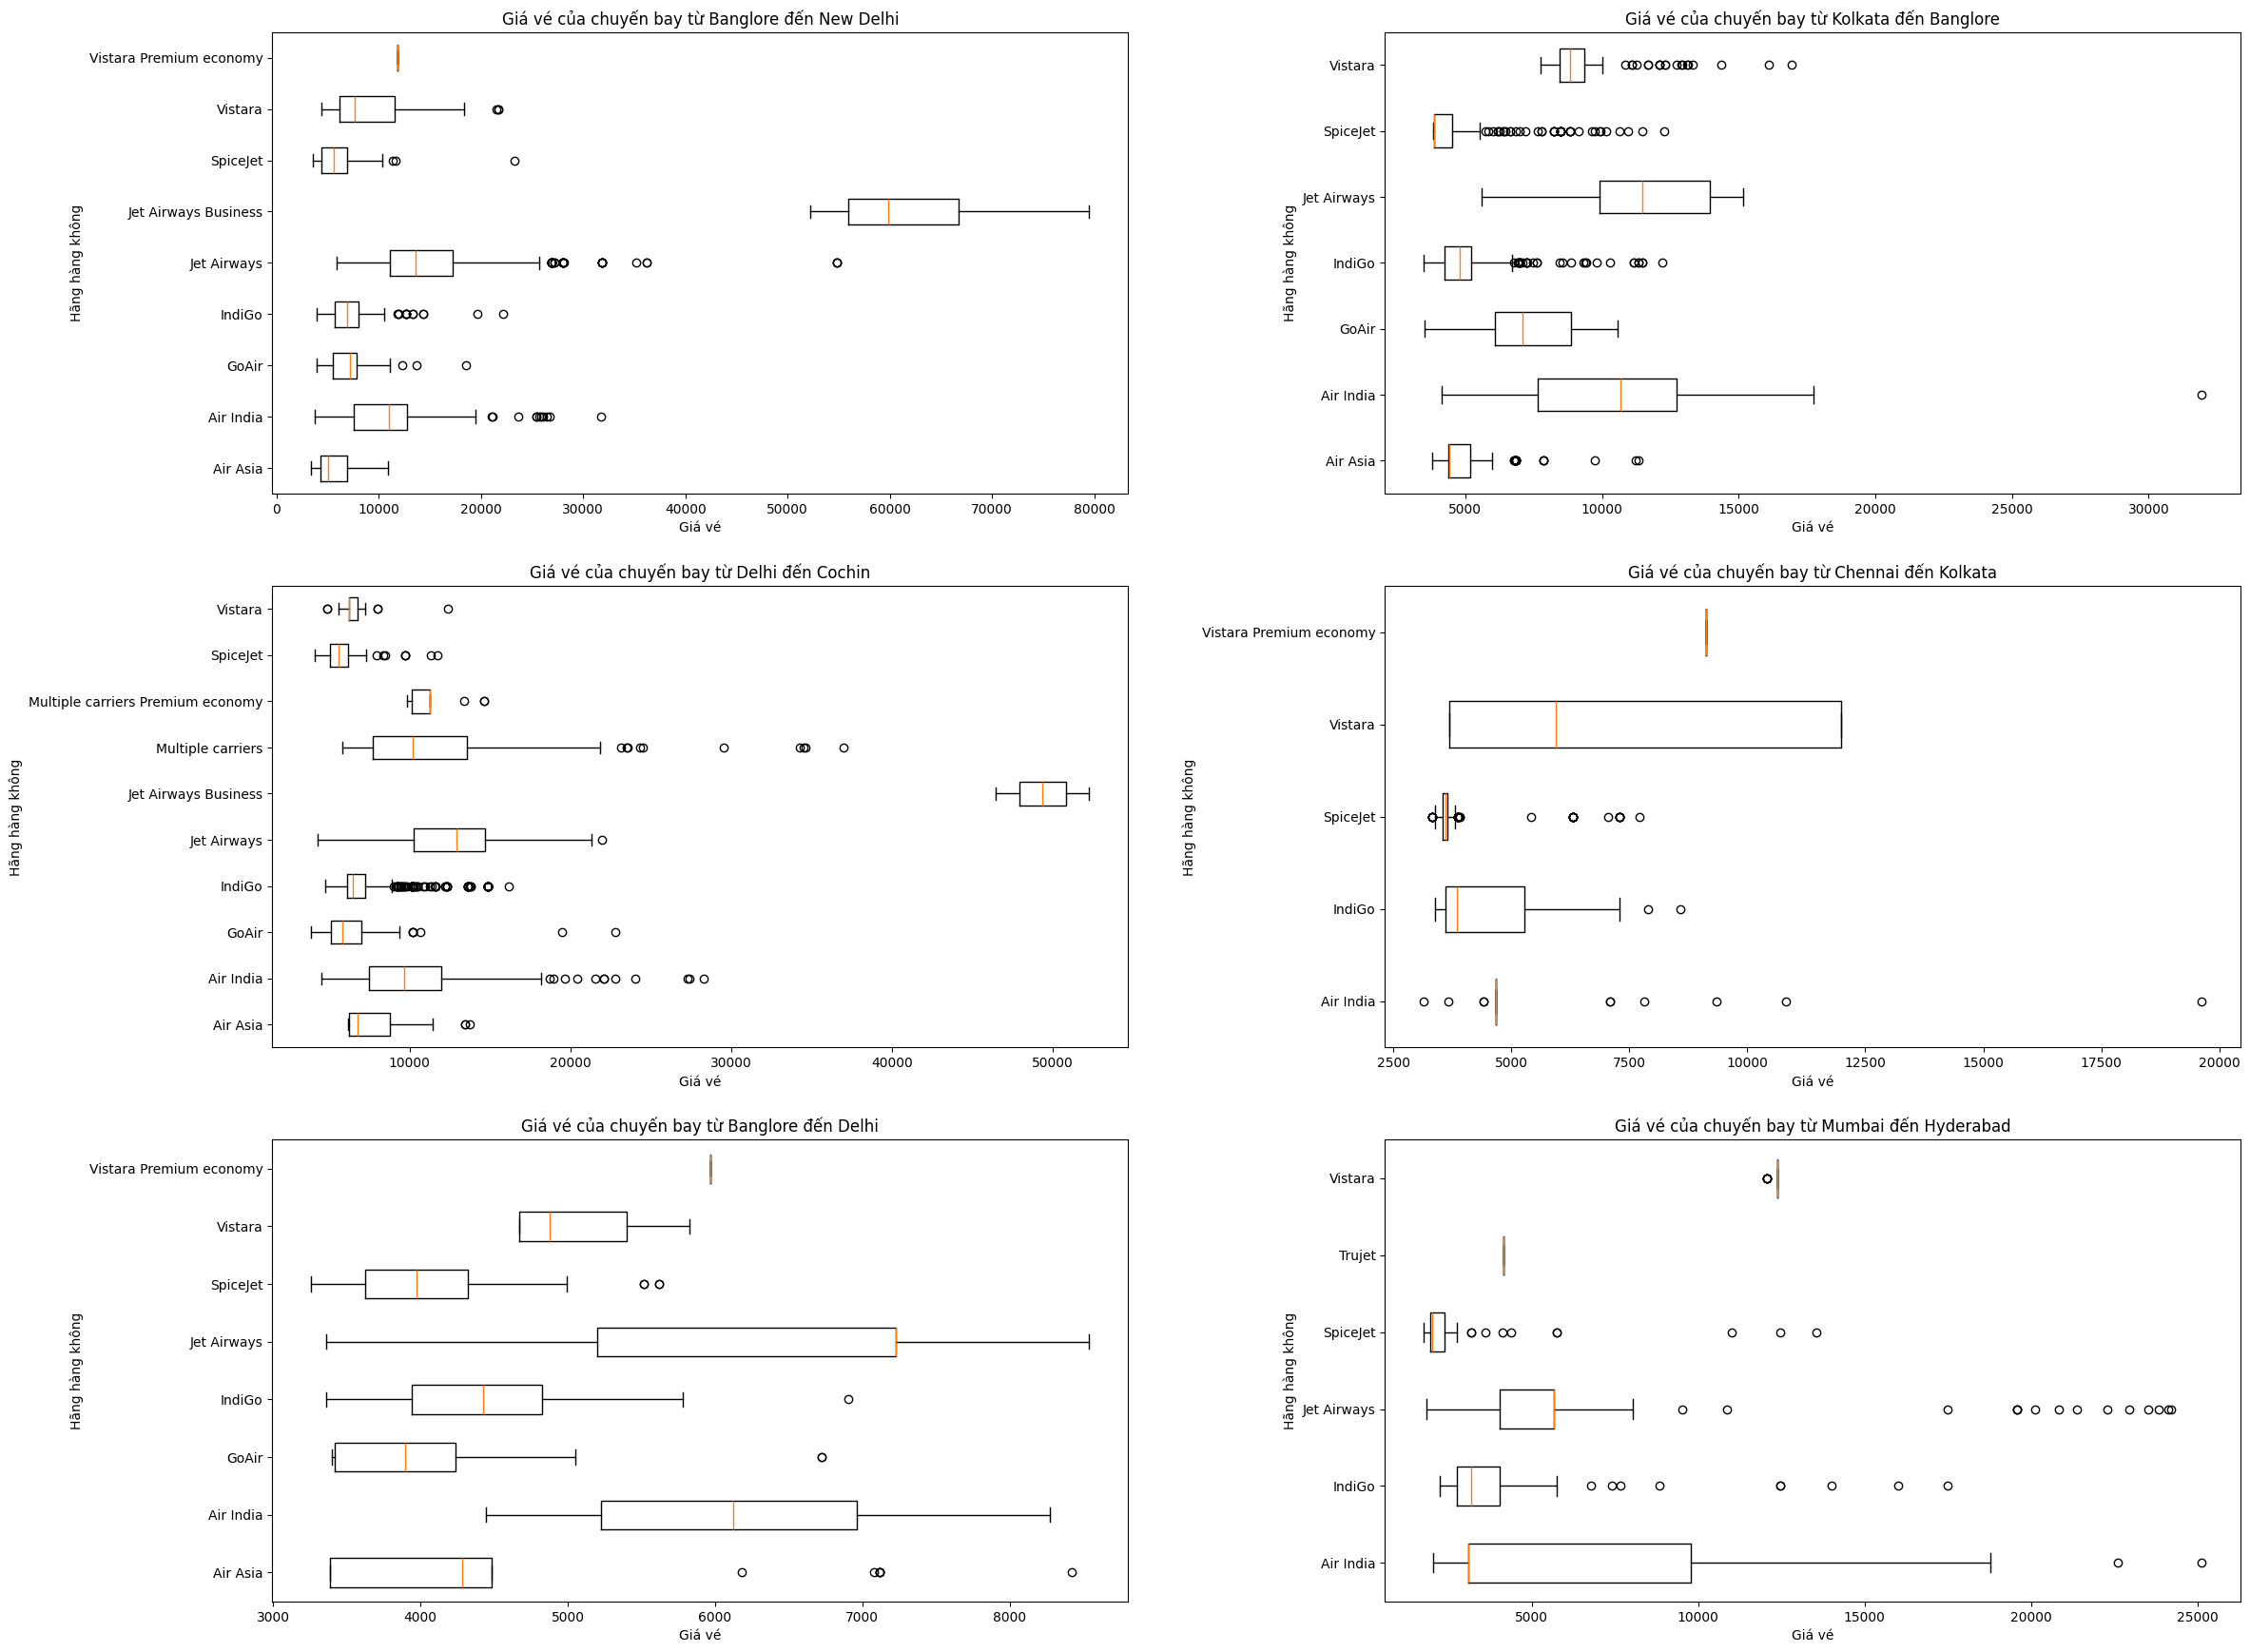

In [35]:
# Tạo biểu đồ boxplot
fig, ax = plt.subplots(3,2, figsize=(18, 15))
ax_flatten = ax.flatten()

for i in range(0, len(flights)):
    # lấy source
    flight_source = flights['Source'][i]
    # Lấy destination
    flight_destination = flights['Destination'][i]
    # Lấy ra các dòng có chung source và destination
    flights_record = q6.loc[(q6['Source'] == flight_source) & (q6['Destination'] == flight_destination)]
    # Lấy danh sách các hãng hàng không có chuyến bay
    airline_list = flights_record['Airline'].unique()
    airline_list = np.sort(airline_list)
    # Lấy danh sách giá theo từng hãng
    prices_list = []
    for a in airline_list:
        prices = flights_record[flights_record['Airline'] == a]['Price']
        prices_list.append(prices)
    # Vẽ boxplot
    q6_plot = ax_flatten[i].boxplot(prices_list, vert=False)
    ax_flatten[i].set_yticklabels(airline_list)
    # Đặt title, xlabel, ylabel
    ax_flatten[i].set_title(f'Giá vé của chuyến bay từ {flight_source} đến {flight_destination}')
    ax_flatten[i].set_xlabel('Giá vé')
    ax_flatten[i].set_ylabel('Hãng hàng không')

# Điều chỉnh subplots
plt.subplots_adjust(left=0.05, bottom=0.1, right=1.2, top=1.2, wspace=0.3, hspace=0.2)

<b> Nhận xét: </b>    
- Từ biểu đồ cho thấy trong 1 chuyến bay, các hãng hàng không đều có nhiều giá vé khác nhau.    
- Các hãng Air Asia, Indigo, SpiceJet, GoAir các chuyến bay đều có giá vé phân phối ở mức giá thấp nhất so với các hãng còn lại.    
- Các hãng Air India, Jet Airways, Multiple carriers các chuyến bay đều có giá vé phân phối ở mức giá cao nhất so với các hãng còn lại.

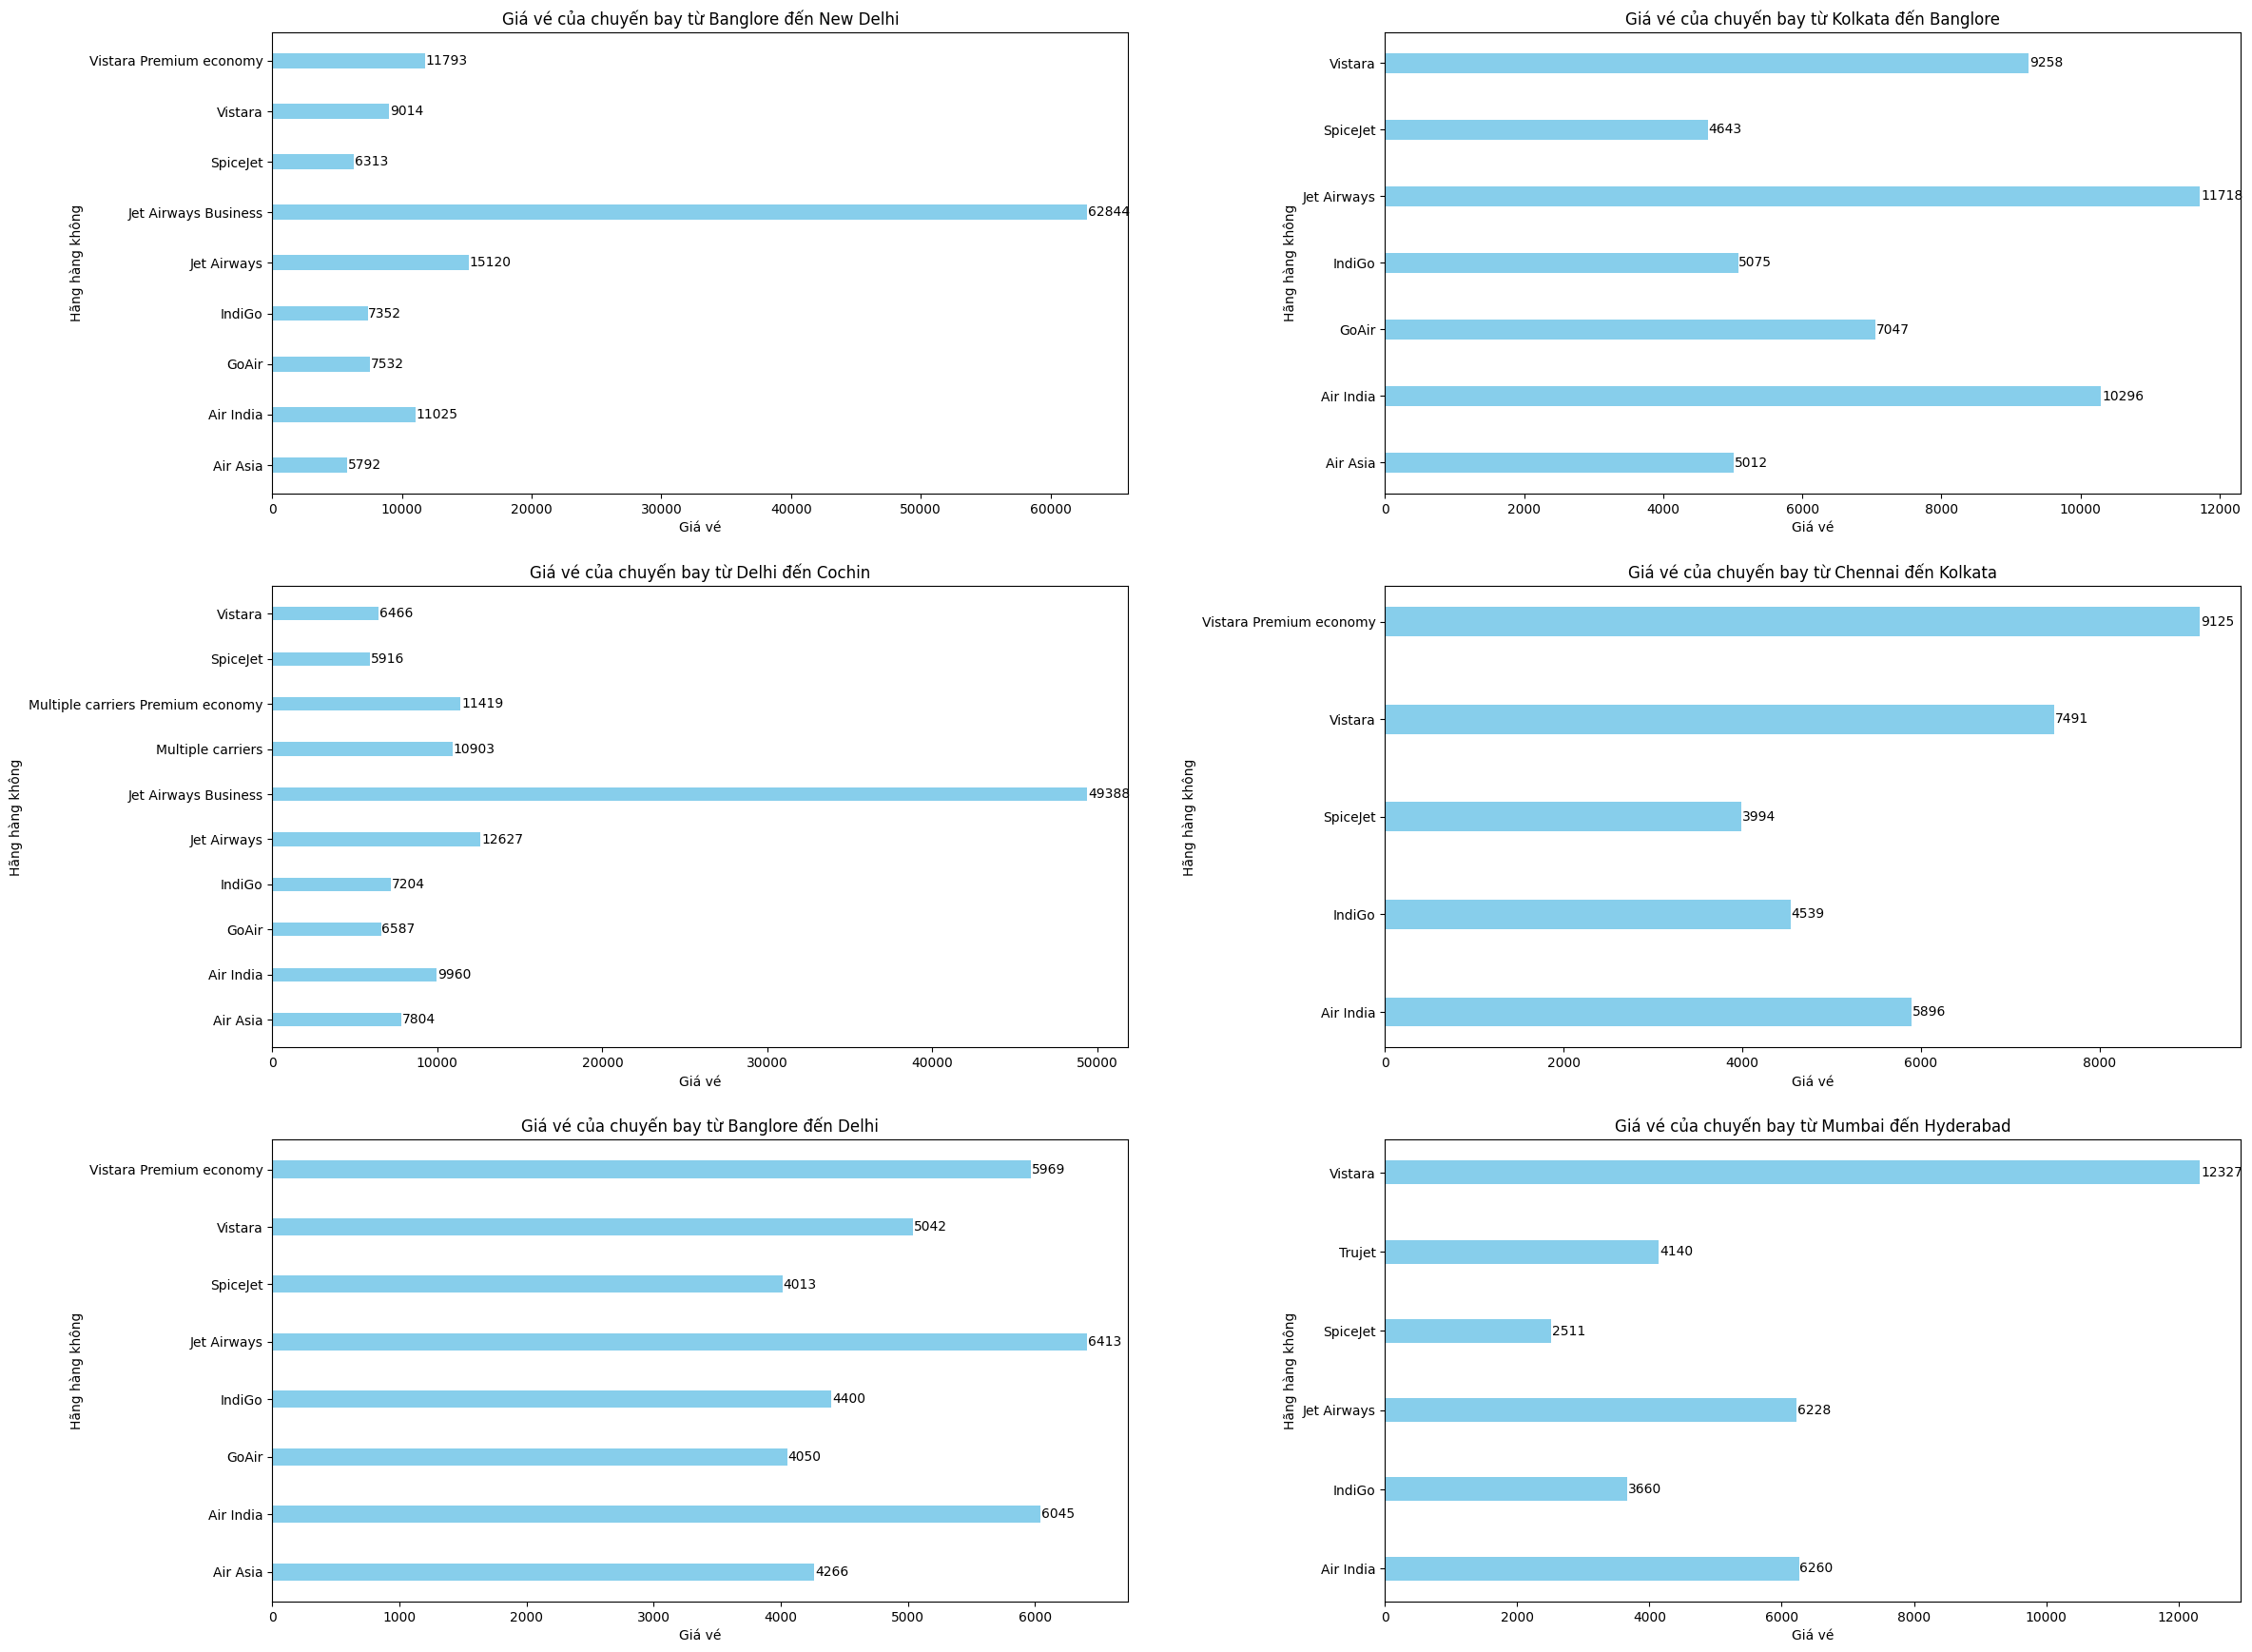

In [36]:
# Tạo biểu đồ cột
fig, ax = plt.subplots(3,2, figsize=(18, 15))
ax_flatten = ax.flatten()

for i in range(0, len(flights)):
    # lấy source
    flight_source = flights['Source'][i]
    # Lấy destination
    flight_destination = flights['Destination'][i]
    # Lấy ra các dòng có chung source và destination
    flights_record = q6.loc[(q6['Source'] == flight_source) & (q6['Destination'] == flight_destination)]
    # Tính giá vé trung bình của chặng bay theo từng hãng
    prices_mean = round(flights_record.groupby('Airline')['Price'].mean(), 0)

    q6_plot = ax_flatten[i].barh(prices_mean.index, prices_mean, height=0.3, color='skyblue')
    # Đặt title, xlabel, ylabel
    ax_flatten[i].set_title(f'Giá vé của chuyến bay từ {flight_source} đến {flight_destination}')
    ax_flatten[i].set_xlabel('Giá vé')
    ax_flatten[i].set_ylabel('Hãng hàng không')
    ax_flatten[i].bar_label(q6_plot, padding=0.5)

# Điều chỉnh subplots
plt.subplots_adjust(left=0.05, bottom=0.1, right=1.2, top=1.2, wspace=0.3, hspace=0.2)

<b> Nhận xét:</b>   
- Jet Airways Business là hãng cung cấp giá vé trung bình cao nhất trong các hãng hàng không.
- Các hãng Jet Airways, Air India, Multiple Carriers, Multiple Carriers Premium Economy, Vistara Premium Economy cung cấp giá vé trung bình các chuyến bay ở mức cao, các hãng Air Asia, Indigo, SpiceJet, GoAir, Trujet ở mức thấp.

#### **7. Giá vé bị ảnh hưởng như thế nào khi mua vé chỉ 1 hoặc 2 ngày trước ngày khởi hành?**

- Bộ dữ liệu không đủ dữ kiện để thực hiện câu hỏi này

#### **8. Giá vé có thay đổi theo thời gian đi và đến không?**

### Create Day, Month, Day_of_Week column to analyse correlation of time and price

In [37]:
# Convert 'Date_of_Journey' to datetime format
df_cleaned['Date_of_Journey'] = pd.to_datetime(df_cleaned['Date_of_Journey'], format='%d/%m/%Y')

# Extract date additional features
df_cleaned['Journey_Day'] = df_cleaned['Date_of_Journey'].dt.day
df_cleaned['Journey_Month'] = df_cleaned['Date_of_Journey'].dt.month
df_cleaned['Day_of_Week'] = df_cleaned['Date_of_Journey'].dt.day_name()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\4123798789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date_of_Journey'] = pd.to_datetime(df_cleaned['Date_of_Journey'], format='%d/%m/%Y')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\4123798789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Journey_Day'] = df_cleaned['Date_of_Journey'].dt.day
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\4123798789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

In [38]:
# Calculate correlation between features and 'Price'
correlation_matrix = df_cleaned[['Journey_Day', 'Journey_Month', 'Price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Journey_Day  Journey_Month     Price
Journey_Day       1.000000      -0.038331 -0.159044
Journey_Month    -0.038331       1.000000 -0.113396
Price            -0.159044      -0.113396  1.000000


- Journey_Day và Price là -0.16: giá vé theo ngày đang tỉ lệ nghịch và độ lớn 0.16 là thể hiện mức độ ảnh hưởng không quá lớn (Ngày càng tăng thì giá vé giảm nhẹ). Lí do có thể là do đầu tháng người dân họ có xu hướng đi du lịch và thực hiện các chuyến bay nhiều hơn.

- Journey_Month và Price là -0.11: giá vé theo tháng đang tỉ lệ nghịch và độ lớn 0.10 là thể hiện mức độ ảnh hưởng không quá lớn (Tháng càng tăng thì giá vé giảm nhẹ, trong data chỉ có tháng 3,4,5,6 của năm 2019). Giá vé của tháng 3 cao nhất là do đây là thời điểm sau Tết cũng như là khoảng thời gian diễn ra lễ hội Holi ở Ấn Độ, vì thế nhu cầu du lịch và đi lại cao hơn so với các tháng say này.

### Create scatterplot to visualize data

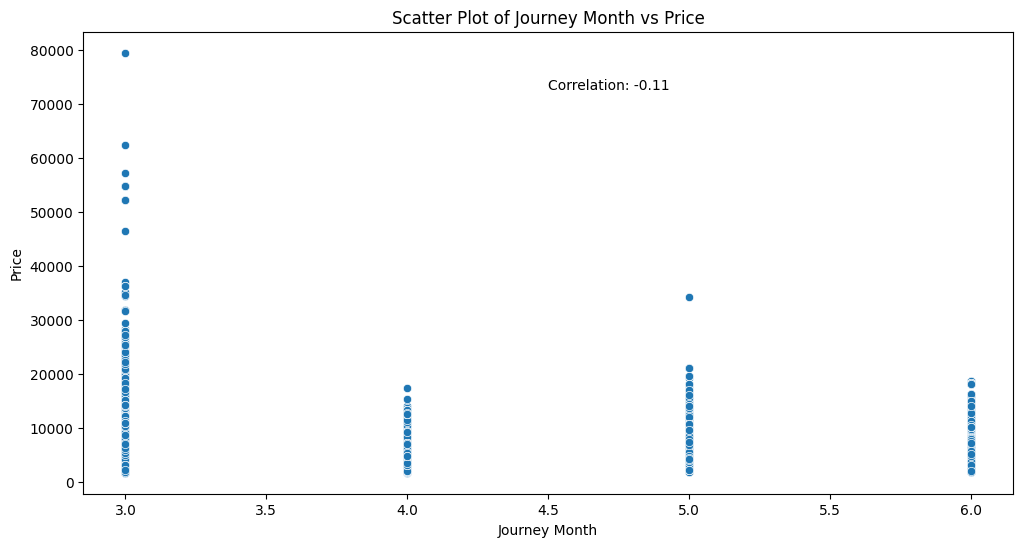

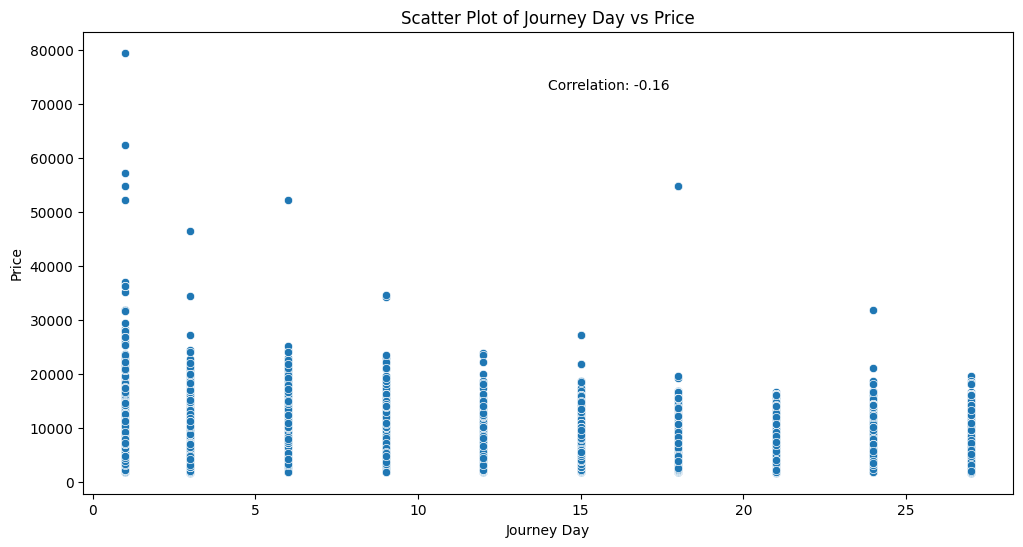

In [39]:
# Scatter plot for 'Journey_Month' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Journey_Month', y='Price', data=df_cleaned)
plt.title('Scatter Plot of Journey Month vs Price')
plt.xlabel('Journey Month')
plt.ylabel('Price')

# Display the correlation coefficient
correlation_month_price = df_cleaned['Journey_Month'].corr(df_cleaned['Price'])
plt.text(0.5, 0.9, f'Correlation: {correlation_month_price:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

# Scatter plot for 'Journey_Day' vs. 'Price'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Journey_Day', y='Price', data=df_cleaned)
plt.title('Scatter Plot of Journey Day vs Price')
plt.xlabel('Journey Day')
plt.ylabel('Price')

# Display the correlation coefficient
correlation_day_price = df_cleaned['Journey_Day'].corr(df_cleaned['Price'])
plt.text(0.5, 0.9, f'Correlation: {correlation_day_price:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

Thông qua 2 scatterplot ở trên, ta thấy sự ảnh hưởng của thời gian lên giá vé là hoàn toàn đúng với những gì ta phân tích phía trên.

Các thứ trong tuần ảnh hưởng như thế nào đến giá vé? Vẽ boxplot của mỗi thứ trong tuần để xem chúng khác nhau như thế nào

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\2264452464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Day_of_Week'], y=df_cleaned['Price'], data=df_cleaned, palette='viridis')


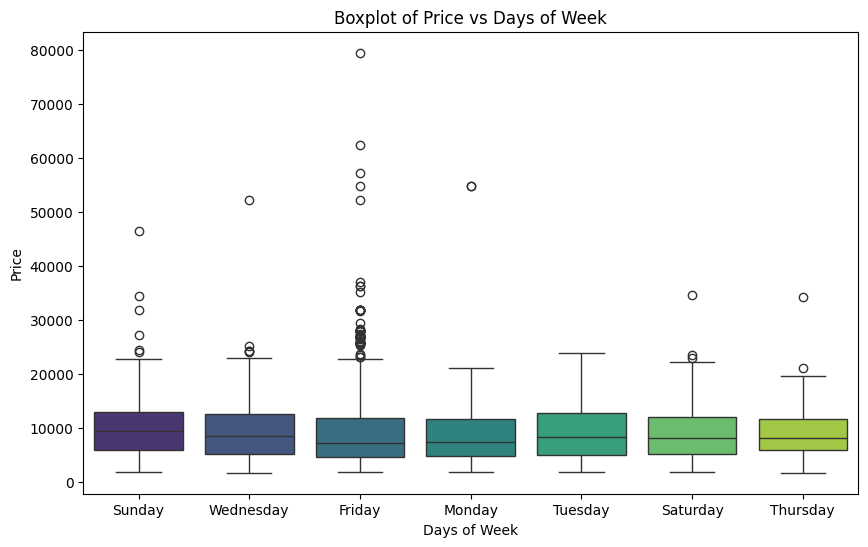

In [40]:
# Boxplot for 'Price' vs. 'Days_of_Week'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Day_of_Week'], y=df_cleaned['Price'], data=df_cleaned, palette='viridis')

plt.title('Boxplot of Price vs Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Price')

plt.show()

- Ta thấy rằng giá vé của chủ nhật là cao nhất.

- Thứ 6 có nhiều outliers nhất do nhu cầu đi lại, du lịch cho cuối tuần sẽ tăng (thứ 6 bay đi thành phố nào đó để du lịch) dẫn đến việc giá vé có thể tăng 1 cách đột ngột.

#### **9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?**

### Get distinct journey (Source -> Destination) and calculate the number of flights and the mean of price of each journey

In [41]:
# Group by 'Source' and 'Destination' and calculate the mean price
mean_price_per_combination = df_cleaned.groupby(['Source', 'Destination'])['Price'].mean().reset_index()

# Sort the DataFrame by mean prices in descending order and ignore the index
mean_price_per_combination = mean_price_per_combination.sort_values(by='Price', ascending=False, ignore_index=True)

# Group by 'Source' and 'Destination' and count the number of flights
count_per_combination = df_cleaned.groupby(['Source', 'Destination']).size().reset_index(name='Number of flights')

# Merge the DataFrames based on 'Source' and 'Destination'
mean_price_per_combination = pd.merge(mean_price_per_combination, count_per_combination, on=['Source', 'Destination'])

# Display the distinct source-destination pairs and their corresponding mean prices
print("Distinct Source -> Destination with mean price and the number of flights:")
mean_price_per_combination

Distinct Source -> Destination with mean price and the number of flights:


,Source,Destination,Price,Number of flights
0,Banglore,New Delhi,12007.421225,914
1,Delhi,Cochin,10461.600690,4345
2,Kolkata,Banglore,9143.083566,2860
3,Banglore,Delhi,5143.918577,1265
4,Mumbai,Hyderabad,5059.708752,697
5,Chennai,Kolkata,4789.892388,381


Dựa vào bảng trên, ta thấy rằng có sự khác nhau rõ rệt giữa điểm xuất phát và điểm đến.

- Chuyến bay từ Banglore -> New Delhi, Delhi -> Cochin (4345 chuyến bay) và Kolkata -> Banglore (2860 chuyến bay) là 3 chuyến bay có giá cao nhất. Vì đây đều là các thành phố lớn và quan trọng với Ấn Độ do đó luôn có nhu cầu đi lại rất lớn.
    - Delhi: Delhi, thủ đô của Ấn Độ, có một dân số lớn với khoảng 16-17 triệu người.
    - Bangalore: Bangalore, một trung tâm công nghệ và IT, cũng có một dân số lớn, ước khoảng 13-14 triệu người.
    - Cochin: Cochin có một trong những cảng tự nhiên lớn nhất thế giới, nơi có hoạt động vận tải hàng hải quan trọng.

- Chuyến bay từ Mumbai -> Hyderabad (697) và Chennai -> Kolkata (381) là 2 chuyến bay có giá thấp nhất cũng như ít chuyến bay nhất.

### Explore the % contribute of each journey to total price

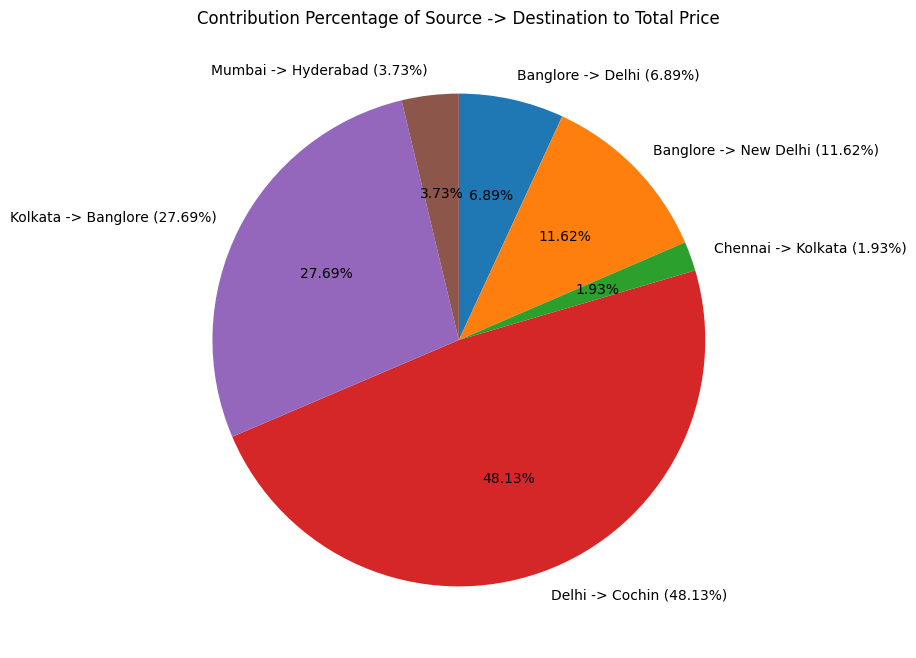

In [42]:
# Calculate total price for the entire dataset
total_price = df_cleaned['Price'].sum()

# Group by 'Source' and 'Destination' and calculate the mean price and count
mean_price_per_combination = df_cleaned.groupby(['Source', 'Destination'])['Price'].agg(['mean', 'count']).reset_index()
mean_price_per_combination.columns = ['Source', 'Destination', 'Mean_Price', 'Count']

# Calculate the contribution percentage for each Source -> Destination pair
mean_price_per_combination['Contribution_Percentage'] = (mean_price_per_combination['Mean_Price'] * mean_price_per_combination['Count'] / total_price) * 100

# Create labels for the pie chart
labels = mean_price_per_combination.apply(lambda row: f"{row['Source']} -> {row['Destination']} ({row['Contribution_Percentage']:.2f}%)", axis=1)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(mean_price_per_combination['Contribution_Percentage'], labels=labels, autopct='%1.2f%%', startangle=90, counterclock=False)
plt.title('Contribution Percentage of Source -> Destination to Total Price')
plt.show()

Dựa vào pie chart trên ta thấy rằng 2 chuyến bay nội địa quan trọng nhất tại Ấn Độ là Delhi -> Cochin (48.13%) và Kolkata -> Banglore (27.69). Các hãng hàng không Ấn Độ nên tập trung khai thác 2 chuyến bay này và nâng cao chất lượng phục vụ của chuyến bay.

## **Ngoài các đặc trưng trong tập dữ liệu, các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay**

#### **1. 19120706_Võ Hữu Anh Tuấn -Yếu tố thời điểm bắt đầu chuyến bay trong 1 ngày ảnh hưởng đến giá vé máy bay**

In [43]:
# sử dụng data mới 
df_add = pd.read_csv("Clean_Dataset.csv")

In [44]:
# Xem các thuộc tính trong cột departure_time
print(df_add['departure_time'].unique())


['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3746560344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time', y='price', data=df_add, palette=boxplot_colors)


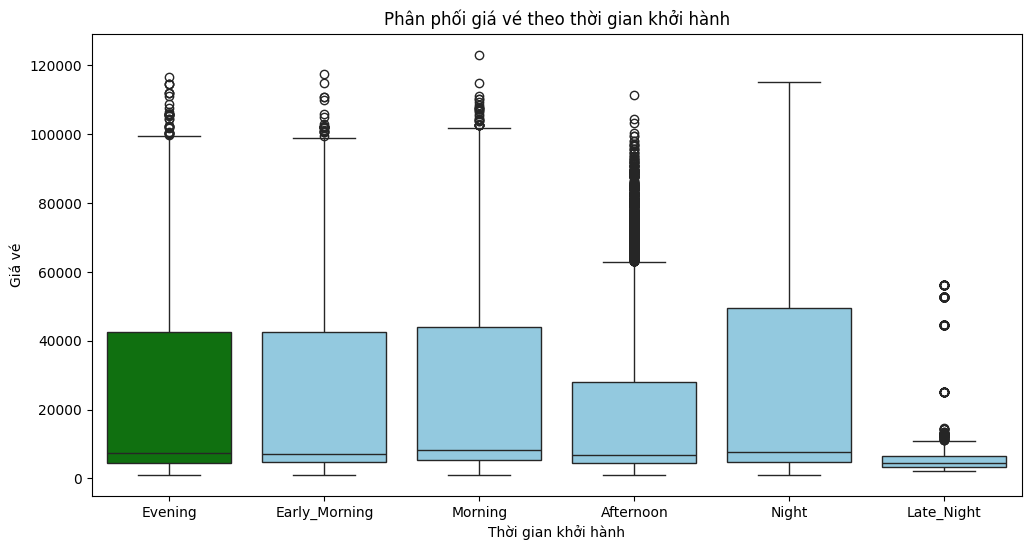

In [45]:
plt.figure(figsize=(12, 6))

departure_times = df_add['departure_time'].unique()

boxplot_colors = ['green' if time == departure_times[0] else 'skyblue' for time in departure_times]

sns.boxplot(x='departure_time', y='price', data=df_add, palette=boxplot_colors)
plt.title('Phân phối giá vé theo thời gian khởi hành')
plt.xlabel('Thời gian khởi hành')
plt.ylabel('Giá vé')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1267254144.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1267254144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)


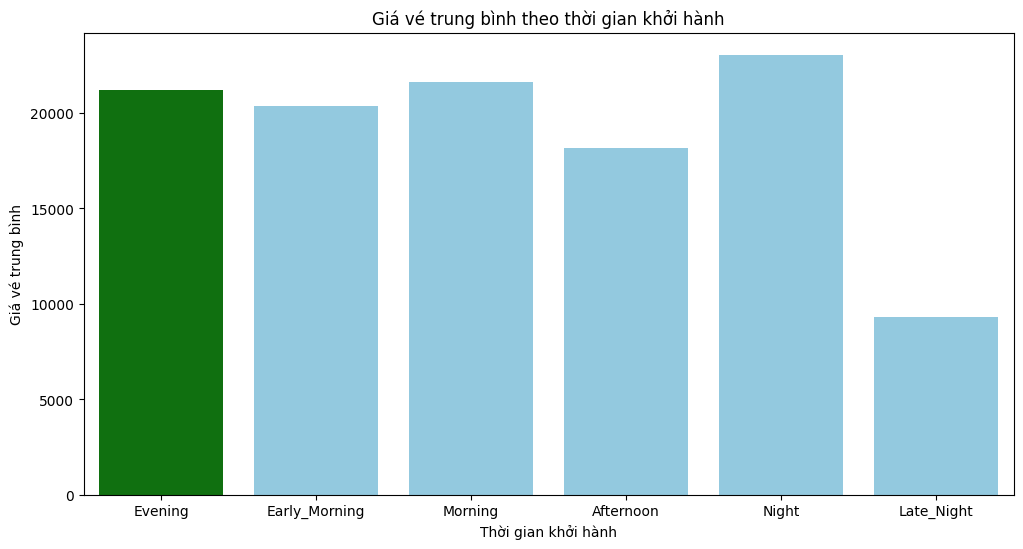

In [46]:
plt.figure(figsize=(12, 6))

# Lấy danh sách thời gian khởi hành
departure_times = df_add['departure_time'].unique()

# Màu sắc cho biểu đồ cột
barplot_colors = ['green' if time == departure_times[0] else 'skyblue' for time in departure_times]

sns.barplot(x='departure_time', y='price', data=df_add, estimator=np.mean, ci=None, palette=barplot_colors)
plt.title('Giá vé trung bình theo thời gian khởi hành')
plt.xlabel('Thời gian khởi hành')
plt.ylabel('Giá vé trung bình')

plt.show()

#### Nhận xét:  
##### *1.1 Nhìn vào hai biểu đồ ta có thể thấy rằng có sự liên quan giữa giá vé và thời gian bay.*
##### *1.2 Các chuyến bay vào buổi tối thì có giá cao vì nhiều người có thể đi giờ này.*
##### *1.3 Còn các chuyến bay vào ban đêm thì có giá thấp hơn.* 
***1.4 Đó chỉ là 1 trong những lí do khiến giá vé thay đổi còn nhiều yếu tố khác nữa dẫn đến sự thay đổi  vì vậy chúng ta thấy có nhiều outlier ở các cột trong biểu đồ 1***

# Dự đoán giá vé

## Check missing value and remove it

In [47]:
# Check missing value
df_cleaned.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Day_of_Week        0
dtype: int64

## Data Preprocessing: Convert categorical variables into numerical representations

### Extract Hour and Minute in Dep_Time

In [48]:
# Extract hour
df_cleaned['Dep_Hour'] = pd.to_datetime(df_cleaned['Dep_Time']).dt.hour

# Extract minute
df_cleaned['Dep_Minute'] = pd.to_datetime(df_cleaned['Dep_Time']).dt.minute

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1384791793.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Dep_Hour'] = pd.to_datetime(df_cleaned['Dep_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1384791793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dep_Hour'] = pd.to_datetime(df_cleaned['Dep_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\1384791793.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format

### Extract Hour and Minute in Arrival_Time

In [49]:
# Extract hour
df_cleaned['Arrival_Hour'] = pd.to_datetime(df_cleaned['Arrival_Time']).dt.hour

# Extract minute
df_cleaned['Arrival_Minute'] = pd.to_datetime(df_cleaned['Arrival_Time']).dt.minute

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3619450934.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Arrival_Hour'] = pd.to_datetime(df_cleaned['Arrival_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3619450934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Arrival_Hour'] = pd.to_datetime(df_cleaned['Arrival_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3619450934.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

### Drop Dep_Time, Date_of_Journey and Arrival_Time

In [50]:
df_cleaned.drop(columns=['Arrival_Time', 'Dep_Time', 'Date_of_Journey'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3144363298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Arrival_Time', 'Dep_Time', 'Date_of_Journey'], inplace=True)


### Create Duration_Hour and Duration_Minute column by split Duration column

In [51]:
# Get duration column
duration = list(df_cleaned['Duration'])

# Format duration string
for i in range(len(duration)):
    # Check duration just have hour or minute
    if len(duration[i].split()) != 2:
        # Just have hour -> add ' 0m' behide
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        # Just have minute -> add '0h ' before
        else:
            duration[i] = '0h ' + duration[i]

duration

# Init duration_hour and duration_minute
duration_hour = []
duration_minute = []


for i in range(len(duration)):
    # Split string at 'h' to extract hour
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))
    # Split string at 'm' to extract minute
    duration_minute.append(int(duration[i].split('m')[0].split()[-1]))

df_cleaned['Duration_Hour'] = duration_hour
df_cleaned['Duration_Minute'] = duration_minute

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3437284174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Duration_Hour'] = duration_hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3437284174.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Duration_Minute'] = duration_minute


In [52]:
# Drop column Duration
df_cleaned.drop(columns='Duration', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\3378223475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns='Duration', inplace=True)


### Convert Airline to one-hot encoding (0, 1)

In [53]:
# Get Airline column
Airline = df_cleaned[['Airline']]

# Use get_dummies function to tranform Airline from string to one-hot encoding
Airline = pd.get_dummies(Airline).astype(int)

Airline.head(5)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


### Convert Source to one-hot encoding (0, 1)

In [54]:
# Get Source column
Source = df_cleaned[['Source']]

# Use get_dummies function to tranform Source from string to one-hot encoding
Source = pd.get_dummies(Source).astype(int)

Source.head(5)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


### Convert Destination to one-hot encoding (0, 1)

In [55]:
# Get Destination column
Destination = df_cleaned[['Destination']]

# Use get_dummies function to tranform Destination from string to one-hot encoding
Destination = pd.get_dummies(Destination).astype(int)

Destination.head(5)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


### Drop no use columns

In [56]:
df_cleaned.drop(columns=['Route', 'Additional_Info'], axis = 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\138999055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Route', 'Additional_Info'], axis = 1,inplace=True)


### Tranform Total_Stops to int

In [57]:
# Replace string value to int value by using replace function
df_cleaned.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9108\731530882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)


### Concat Airline, Source, Destination (after one-hot encoding) to df

In [58]:
df_cleaned = pd.concat([df_cleaned, Airline, Source, Destination], axis = 1)

In [59]:
# Drop some unnecessary columns
df_cleaned.drop(columns=['Airline', 'Source', 'Destination', 'Day_of_Week'], inplace=True)

### Final dataset for predict

In [60]:
df_cleaned.head(5)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Feature selection

In [61]:
# Independent variable
X = df_cleaned.drop(columns='Price', axis = 1)

# Dependent variable
Y = df_cleaned['Price']

In [62]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

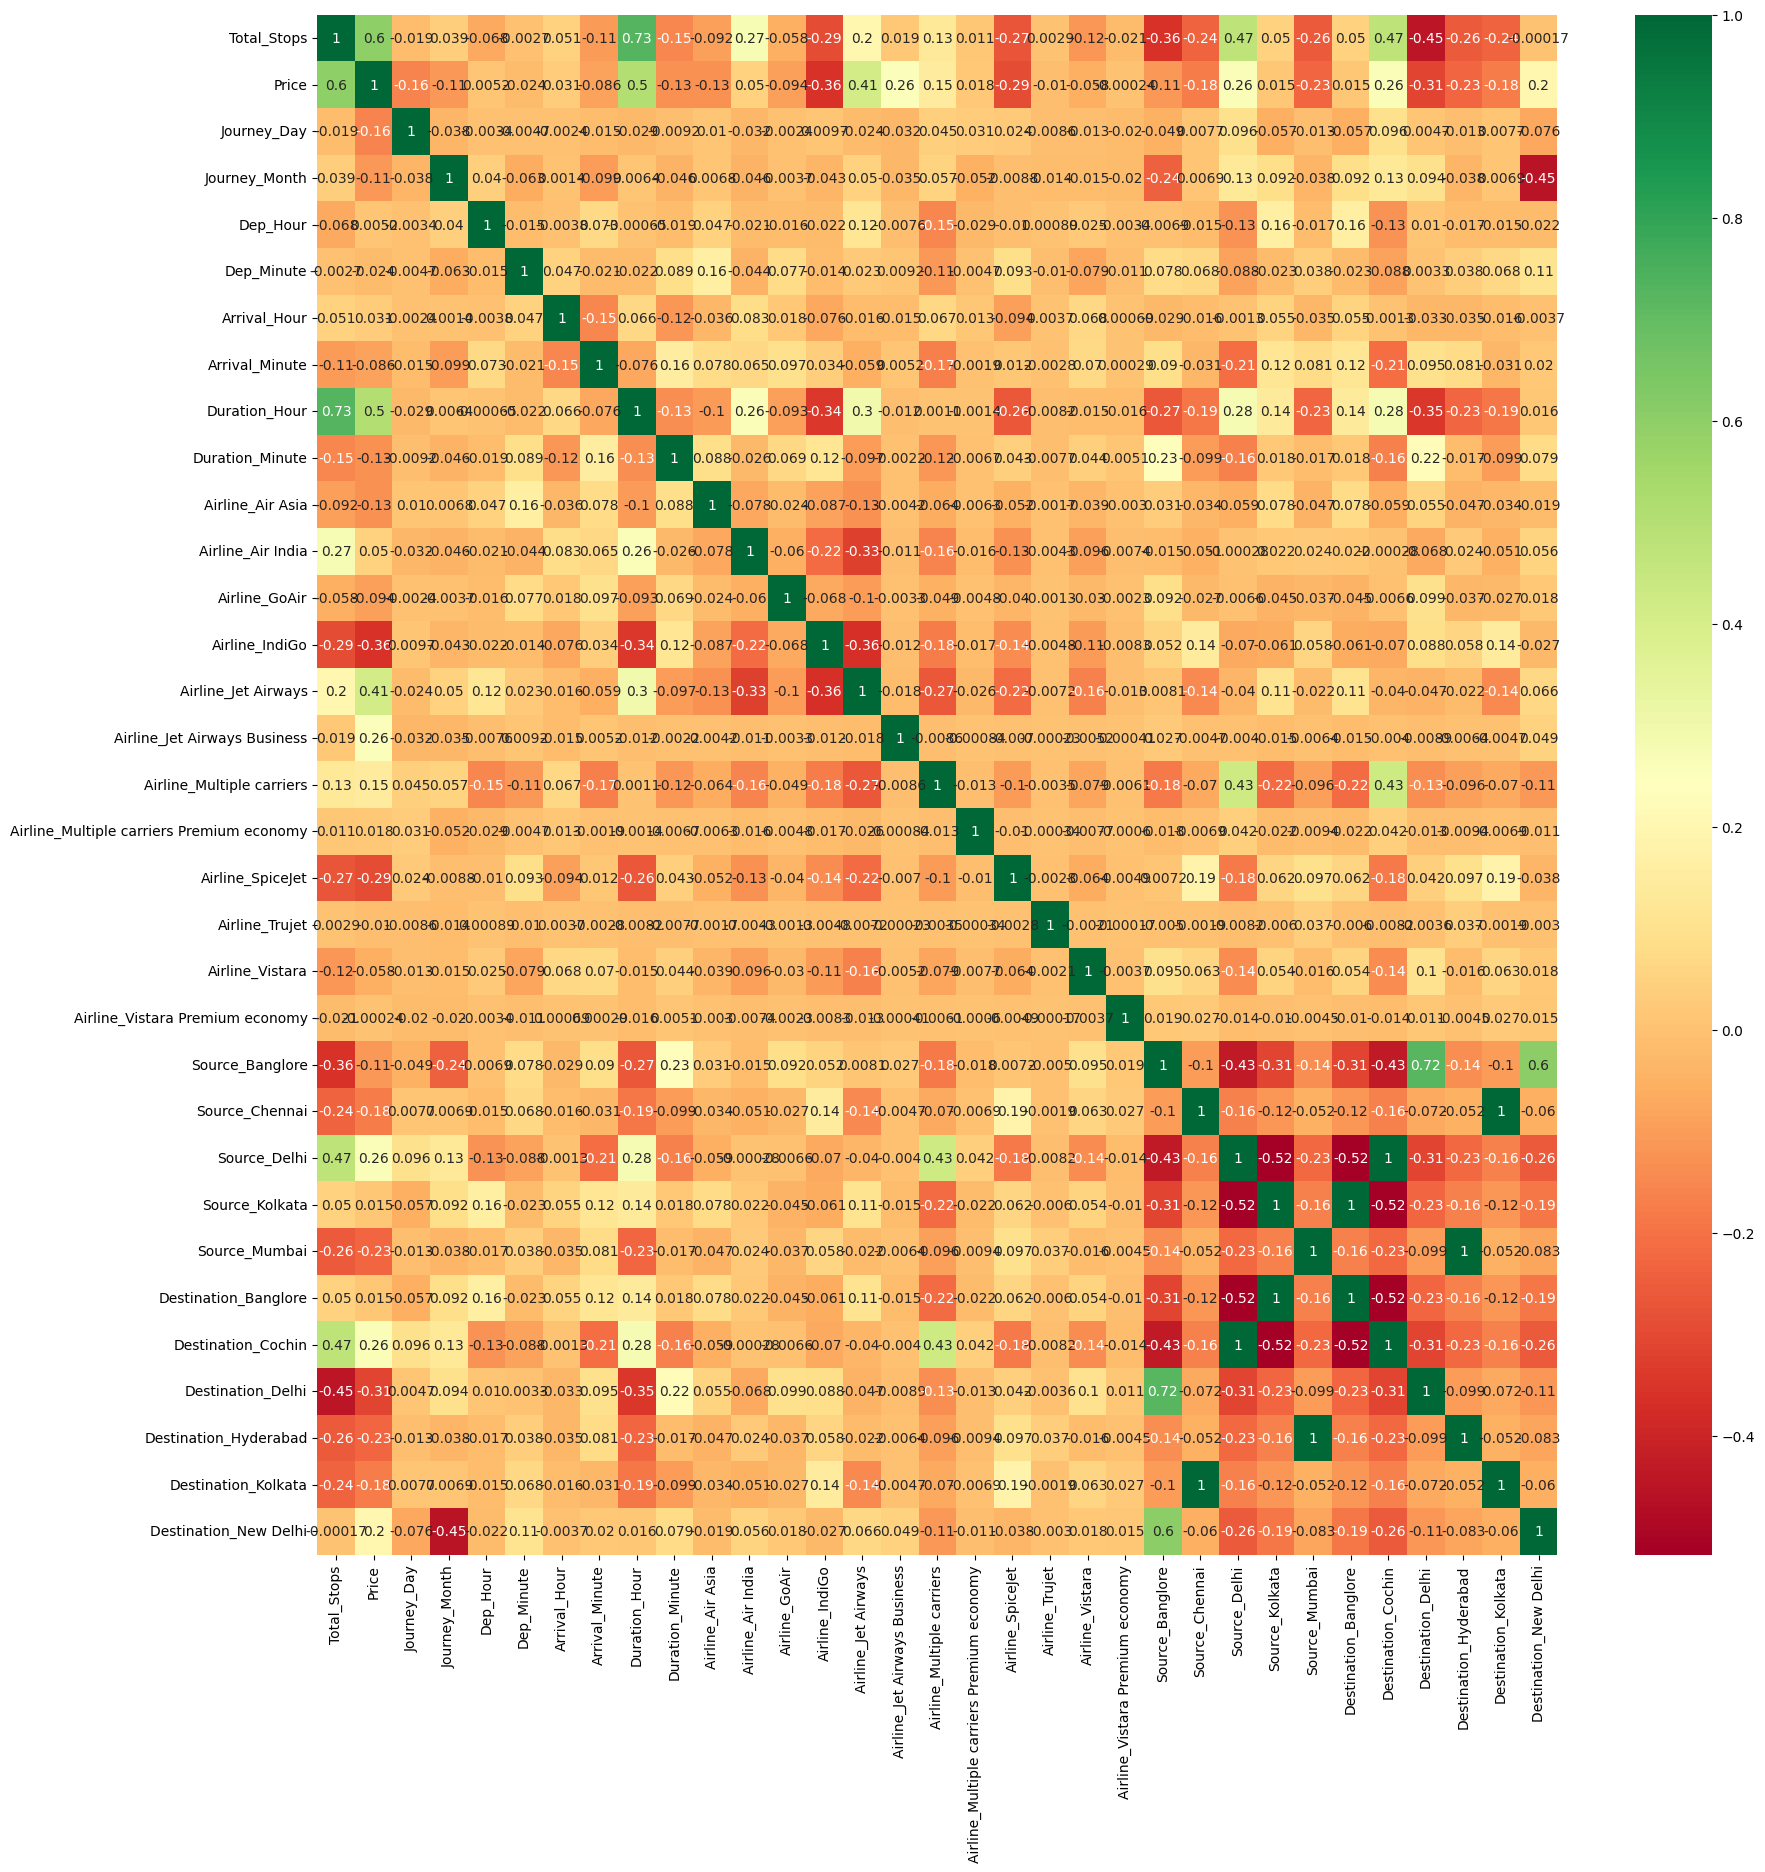

In [64]:
plt.figure(figsize=(20,20))

sns.heatmap(df_cleaned.corr(), annot=True, cmap = 'RdYlGn')

plt.show()

Các thuộc tính nào càng gần +-1 so với thuộc tính Price cho thấy mức độ ảnh hưởng của nó lên giá vé máy bay càng lớn.
- số dương --> đồng biến

- số âm --> nghịch biến

## Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split

# Use train_test_split function to split data into train(80%) and test(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)

ModuleNotFoundError: No module named 'sklearn'

## Model Selection and Training

In [ ]:
# Fit model using Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

## Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = rfr_model.predict(X_test)

## Show prediction

In [ ]:
# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Prediction'])

# Reset the index for X_test and Y_test
X_test_reset = X_test.reset_index(drop=True)
Y_test_reset = Y_test.reset_index(drop=True)

# Concatenate X_test, Y_test, and y_pred_df along columns
result = pd.concat([X_test_reset, Y_test_reset, y_pred_df], axis=1)

# Calculate the difference between "Price" and "Prediction"
result['Difference'] = abs(result['Price'] - result['Prediction'])

# Sort the DataFrame by the difference in ascending order
result_sorted = result.sort_values(by='Difference', ascending=True)

# Display the sorted result
result_sorted

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air Asia,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Prediction,Difference
712,0,18,6,13,15,15,35,2,20,0,...,0,0,0,0,0,1,0,3597,3597.000,0.000
488,0,12,6,15,30,18,5,2,35,0,...,0,1,0,0,0,0,0,4804,4804.000,0.000
199,0,27,6,17,15,19,50,2,35,0,...,0,1,0,0,0,0,0,4804,4804.000,0.000
737,1,12,3,20,35,18,25,21,50,0,...,0,0,0,0,0,0,1,11087,11087.000,0.000
385,0,21,5,17,15,19,50,2,35,0,...,0,1,0,0,0,0,0,4804,4804.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2,6,3,16,50,16,55,0,5,0,...,1,0,0,0,1,0,0,17327,5999.712,11327.288
1856,2,1,3,8,50,10,35,25,45,0,...,0,0,0,0,0,0,1,31783,20281.080,11501.920
1290,1,3,3,14,10,19,20,5,10,0,...,0,0,1,0,0,0,0,22794,8573.190,14220.810
1045,1,18,3,22,50,5,5,6,15,0,...,0,0,0,0,0,0,1,54826,25564.068,29261.932


Có những records model dự đoán chính xác (Price = Prediction). Dự đoán chênh lệch nhiều nhất là 47153.550000

In [ ]:
# Calculate R-squared of training set: measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
rfr_model.score(X_train,Y_train)

0.9540010685408608

In [ ]:
# Calculate R-squared of testing set: measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
rfr_model.score(X_test,Y_test)

0.7748041895858573

Điểm càng gần 1 càng tốt --> model đạt điểm tốt

<Figure size 800x800 with 0 Axes>

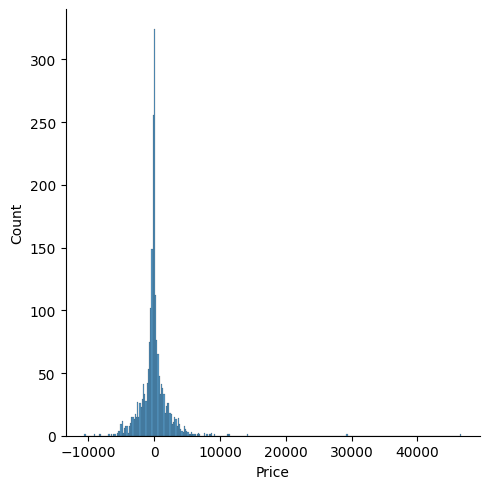

In [ ]:
# Show differences between the actual target values (Y_test) and the predicted values (y_pred)
plt.figure(figsize=(8,8))
sns.displot(Y_test - y_pred)
plt.show()

Biểu đồ này thể hiện nếu có càng nhiều giá trị gần 0 hoặc = 0 thì càng tốt. --> Model đang làm khá tốt việc predict

### Calculate some metrics

In [ ]:
from sklearn import metrics

# MAE gives a measure of the average absolute error between the predicted and actual values
print('MAE: ', metrics.mean_absolute_error(Y_test, y_pred))

# MSE the average of the squared differences between the actual values and the predicted values.
print('MSE: ', metrics.mean_squared_error(Y_test, y_pred))

# The Root Mean Squared Error is the square root of the MSE.
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

# The R-squared score ranges from 0 to 1, where 1 indicates a perfect fit, and 0 indicates that the model does not explain any of the variability 
# in the target variable.
print('R2_score: ', metrics.r2_score(Y_test, y_pred))

MAE:  1216.758592583917
MSE:  5095316.515867883
RMSE:  2257.280779138449
R2_score:  0.7748041895858573


Các metrics dùng để đánh giá model
- Dựa vào R2_score = 0.776 --> Model dự đoán khá tốt.

## Save model into pickle file

Mục đích là ta sẽ không cần train lại model khi mở lại file mà chỉ cần đọc file pickle để lấy ra model mình đã train

In [ ]:
import pickle

# Write data into pickle file
file = open('Flight_Fare_Prediction.pickle', 'wb')
pickle.dump(rfr_model, file)

In [ ]:
# Load model from pickle file to mod
model = open('Flight_Fare_Prediction.pickle', 'rb')
mod = pickle.load(model)

In [ ]:
predict_data = mod.predict(X_test)

In [ ]:
metrics.r2_score(Y_test, predict_data)

0.7748041895858573